Intensity

In [ ]:
!pip install pyloudnorm

In [ ]:
import soundfile as sf
import pyloudnorm as pyln

data, rate = sf.read("/content/1002_IEO_ANG_HI.wav")
meter = pyln.Meter(rate)
loudness = meter.integrated_loudness(data)
positive_intensity = abs(loudness)

print("Absolute Intensity:", positive_intensity)


Absolute Intensity: 23.30238805758739


LPC

In [ ]:
!pip install python_speech_features

  Preparing metadata (setup.py) ... done
  Created wheel for python_speech_features: filename=python_speech_features-0.6-py3-none-any.whl size=5872 sha256=55a1ec1470285be70d7368247e18b7211446b9e6446a1442344f8c642ad0a253
  Stored in directory: /root/.cache/pip/wheels/5a/9e/68/30bad9462b3926c29e315df16b562216d12bdc215f4d240294
Successfully built python_speech_features


In [ ]:
import numpy as np
from scipy.io import wavfile
from scipy.signal import lfilter
from python_speech_features import sigproc

# Load the audio file
audio_file = "/content/1002_IEO_ANG_HI.wav"
rate, audio = wavfile.read(audio_file)

# Pre-emphasize the audio signal (optional but often used)
preemphasized_audio = sigproc.preemphasis(audio, coeff=0.97)

# Frame the audio signal
frame_length = int(0.05 * rate)  # Frame length in samples (typical value)
frame_step = int(0.02 * rate)     # Frame step in samples (typical value)
frames = sigproc.framesig(preemphasized_audio, frame_length, frame_step)

# Define the order of the LPC model
lpc_order = 12  # You can adjust this value as needed

# Calculate LPC coefficients for each frame
lpc_coeffs = []
for frame in frames:
    a = lfilter([1], np.concatenate(([1], np.zeros(lpc_order - 1))), frame)
    lpc_coeffs.append(a)

# Concatenate all LPC coefficients into a single array
all_coeffs = np.vstack(lpc_coeffs)

# Print the concatenated LPC coefficients
print("All LPC Coefficients:")
print(all_coeffs)


All LPC Coefficients:
[[-102.     -1.06   -1.   ...   31.58   -0.46   41.51]
 [ -26.84    8.56   29.04 ...   19.5   -17.96   -0.56]
 [  17.24   -2.16   21.84 ...   -1.05   22.77  -30.69]
 ...
 [   9.98    8.31   17.58 ...  -22.42   -9.99   13.83]
 [ -10.83  -25.19   24.03 ...    0.      0.      0.  ]
 [  -5.81  -23.96  -37.65 ...    0.      0.      0.  ]]


K-Fold Cross Validation

In [ ]:
# Install necessary libraries
# pip install librosa scikit-learn tensorflow

import os
import librosa
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import load_model

# Load the pre-trained model
model = load_model('path/to/your/pretrained_model.h5')

def extract_features(file_path):
    # Load audio file
    audio, sr = librosa.load(file_path, sr=None)

    # Extract features using Librosa
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
    chroma = librosa.feature.chroma_stft(y=audio, sr=sr)
    mel = librosa.feature.melspectrogram(y=audio, sr=sr)

    # Concatenate features
    features = np.concatenate((mfccs, chroma, mel))

    # Pad features to a consistent length
    pad_width = 174 - features.shape[1]
    features = np.pad(features, pad_width=((0, 0), (0, pad_width)))

    return features

def train_and_evaluate(X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    # Make predictions on the test set
    predictions = model.predict(X_test)

    # Get the predicted class for each sample
    predicted_classes = np.argmax(predictions, axis=1)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, predicted_classes)

    return accuracy

# Replace 'your_data_directory' with the path to your dataset
data_directory = 'path/to/your_data_directory'

# Replace 'your_preprocessed_data.npy' with your preprocessed data file
# The data file should contain a list of tuples (file_path, label)
data_file = 'path/to/your_preprocessed_data.npy'
data = np.load(data_file, allow_pickle=True)

X = []
y = []

# Extract features and labels from the data
for file_path, label in data:
    file_path = os.path.join(data_directory, file_path)
    features = extract_features(file_path)
    X.append(features)
    y.append(label)

X = np.array(X)
y = np.array(y)

# Use KFold for 3-fold cross-validation
kf = KFold(n_splits=3, shuffle=True, random_state=42)

fold_accuracies = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    accuracy = train_and_evaluate(X_train, y_train, X_test, y_test)
    fold_accuracies.append(accuracy)

print(f'Cross-validation accuracies: {fold_accuracies}')
print(f'Mean accuracy: {np.mean(fold_accuracies)}')


Normalization

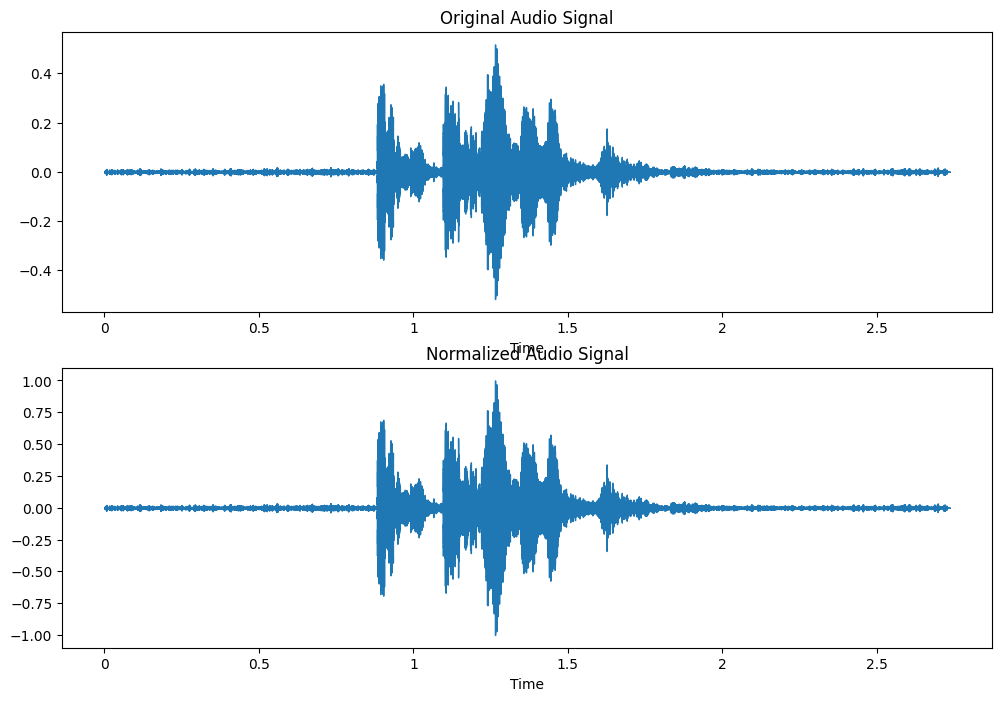

In [ ]:
# Install necessary libraries
# pip install librosa

import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

def normalize_audio(file_path):
    # Load audio file
    audio, sr = librosa.load("/content/1002_IEO_ANG_HI.wav", sr=None)

    # Normalize the audio signal
    normalized_audio = librosa.util.normalize(audio)

    return normalized_audio, sr


# Replace 'your_audio_file.wav' with the path to your audio file
audio_file_path = 'path/to/your_audio_file.wav'
normalized_audio, sr = normalize_audio(audio_file_path)

# Plot the original and normalized audio signals
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
librosa.display.waveshow(librosa.load("/content/1002_IEO_ANG_HI.wav", sr=None)[0], sr=sr)
plt.title('Original Audio Signal')

plt.subplot(2, 1, 2)
librosa.display.waveshow(normalized_audio, sr=sr)
plt.title('Normalized Audio Signal')

plt.show()


In [ ]:
import librosa
x, sr = librosa.load('/content/1002_IEO_ANG_HI.wav')
lpc = librosa.lpc(x, order=13)
print(lpc)

[  1.          -3.6290374    7.7039547  -12.812772    18.047342
 -22.202244    24.104378   -22.977036    19.29081    -14.316311
   9.143858    -4.7438517    1.8293393   -0.39606175]


Compile code

In [ ]:
with mfcc lpc and llc

import librosa
import numpy as np

# Load the audio file and extract MFCC features
audio_file = "/content/1002_IEO_ANG_HI.wav"
y, sr = librosa.load(audio_file, sr=None, mono=True, res_type='kaiser_fast')

# Extract the MFCC features
mfcc = librosa.feature.mfcc(y=y, sr=sr)

# Print the MFCC features
print(mfcc)
#---------------------------------------------------------------------------
#Extracting LPC coefficients
import librosa
x, sr = librosa.load('/content/1002_IEO_ANG_HI.wav')
lpc = librosa.lpc(x, order=13)
#----------------------------------------------------------------------------

# Define the file path of your audio file
audio_file = "/1001_IEO_HAP_HI.wav"

# Number of times to concatenate the features
num_concatenations = 13  # Change this value as needed

# Extract features from the audio file
mfcc_features = extract_first_13_mfcc(audio_file)
lpc_features = extract_first_12_lpc(audio_file)
llc_features = extract_first_13_llc(audio_file)

# Concatenate the features
concatenated_features = np.concatenate((mfcc_features, lpc_features, llc_features), axis=0)

# Repeat the concatenated features based on the specified number of concatenations
final_result = np.tile(concatenated_features, (1, num_concatenations))

# Print the final result
print(final_result)

In [ ]:
import librosa

def extract_audio_features(audio_file_path):
    # Load the audio file
    y, sr = librosa.load("/content/1002_IEO_ANG_HI.wav")

    # Extract features using librosa
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)  # Using 13 MFCC coefficients
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)

    # Combine the features into a single array
    features = []
    features.extend(mfcc)
    features.extend(chroma)
    features.extend(spectral_contrast)

    # Flatten the feature array
    features_flat = [item for sublist in features for item in sublist]

    # Select the first 88 coefficients
    selected_coefficients = features_flat[:88]

    return selected_coefficients

# Example usage
audio_path = 'path_to_your_audio_file.wav'
coefficients = extract_audio_features(audio_path)
print("Extracted Coefficients:", coefficients)


Extracted Coefficients: [-502.04605, -475.34174, -476.65936, -473.39047, -473.60367, -477.92398, -478.9282, -476.60507, -474.36023, -476.3912, -477.64694, -476.64935, -477.44104, -476.61115, -479.5201, -476.06702, -476.6233, -474.076, -474.40326, -472.738, -474.0413, -471.03064, -475.96472, -471.83032, -454.8768, -440.3183, -440.18332, -444.81393, -427.19785, -412.5971, -409.72937, -403.75836, -407.0153, -433.7982, -456.18774, -470.16418, -470.56824, -260.74557, -149.35066, -120.77677, -154.94435, -210.31058, -224.95544, -212.17636, -218.08601, -256.81265, -259.8551, -163.53954, -133.68555, -163.1489, -203.4214, -237.63606, -209.99481, -159.84087, -160.94939, -187.50954, -216.73347, -244.93839, -213.0641, -191.50058, -207.1788, -221.47253, -200.62497, -207.76393, -256.08502, -279.10385, -285.33618, -285.0429, -287.63815, -257.3289, -236.7998, -241.69482, -265.02893, -281.80118, -289.9081, -301.85062, -332.7485, -372.3612, -388.01984, -340.33423, -330.2869, -339.40186, -350.2859, -371.1

In [ ]:
pip install opensmile

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 996.2/996.2 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.0/129.0 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.6/134.6 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.4/167.4 kB 14.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for iso-639: filename=iso_639-0.4.5-py3-none-any.whl size=168841 sha256=74fd88013c12381de1dcbe241c0877a97bc05e869ef5f0f518da533f0d3f305a
  Stored in directory: /root/.cache/pip/wheels/d8/78/cc/5478ca3b1c3f602eae6f8cdbd78f909c0a0bfa0bbcb5c7771f
Successfully built iso-639


In [ ]:
import opensmile

smile = opensmile.Smile(
    feature_set=opensmile.FeatureSet.ComParE_2016,
    feature_level=opensmile.FeatureLevel.Functionals,
)
y = smile.process_file('/content/1002_IEO_ANG_HI.wav')


In [ ]:
y

audspec_lengthL1norm_sma_range  \
file                         start  end                                                         
/content/1002_IEO_ANG_HI.wav 0 days 0 days 00:00:02.736062500                          1.9358   

                                                               audspec_lengthL1norm_sma_maxPos  \
file                         start  end                                                          
/content/1002_IEO_ANG_HI.wav 0 days 0 days 00:00:02.736062500                         0.334586   

                                                               audspec_lengthL1norm_sma_minPos  \
file                         start  end                                                          
/content/1002_IEO_ANG_HI.wav 0 days 0 days 00:00:02.736062500                         0.996241   

                                                               audspec_lengthL1norm_sma_quartile1  \
file                         start  end                                                             
/content/1002_IEO_ANG_HI.wav 0 days 0 days 00:00:02.736062500                            0.101863   

                                                               audspec_lengthL1norm_sma_quartile2  \
file                         start  end                                                             
/content/1002_IEO_ANG_HI.wav 0 days 0 days 00:00:02.736062500                            0.124296   

                                                               audspec_lengthL1norm_sma_quartile3  \
file                         start  end                                                             
/content/1002_IEO_ANG_HI.wav 0 days 0 days 00:00:02.736062500                               0.523   

                                                               audspec_lengthL1norm_sma_iqr1-2  \
file                         start  end                                                          
/content/1002_IEO_ANG_HI.wav 0 days 0 days 00:00:02.736062500                         0.022432   

                                                               audspec_lengthL1norm_sma_iqr2-3  \
file                         start  end                                                          
/content/1002_IEO_ANG_HI.wav 0 days 0 days 00:00:02.736062500                         0.398705   

                                                               audspec_lengthL1norm_sma_iqr1-3  \
file                         start  end                                                          
/content/1002_IEO_ANG_HI.wav 0 days 0 days 00:00:02.736062500                         0.421137   

                                                               audspec_lengthL1norm_sma_percentile1.0  \
file                         start  end                                                                 
/content/1002_IEO_ANG_HI.wav 0 days 0 days 00:00:02.736062500                                 0.09394   

                                                               ...  \
file                         start  end                        ...   
/content/1002_IEO_ANG_HI.wav 0 days 0 days 00:00:02.736062500  ...   

                                                               mfcc_sma_de[14]_peakRangeAbs  \
file                         start  end                                                       
/content/1002_IEO_ANG_HI.wav 0 days 0 days 00:00:02.736062500                      5.448684   

                                                               mfcc_sma_de[14]_peakRangeRel  \
file                         start  end                                                       
/content/1002_IEO_ANG_HI.wav 0 days 0 days 00:00:02.736062500                      0.421361   

                                                               mfcc_sma_de[14]_peakMeanAbs  \
file                         start  end                                                      
/content/1002_IEO_ANG_HI.wav 0 days 0 days 00:00:02.736062500                     2.374722   

  

In [ ]:
pip install audb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.2 MB/s eta 0:00:00


In [ ]:
import os
import time

import numpy as np
import pandas as pd

import audb
import audiofile
import opensmile


db = audb.load(
    'cremad',
    format='wav',
    mixdown=True,
    sampling_rate=16000,
    media='wav/03a01.*',  # load subset
    full_path=False,
    verbose=False,
)

BackendError: ignored

In [ ]:
folder_path = '/content/1002_IEO_ANG_HI.wav'
file = os.path.join(folder_path)
signal, sampling_rate = audiofile.read(
    file,
    duration=10,
    always_2d=True,
)

In [ ]:
smile = smile = opensmile.Smile(
    feature_set=opensmile.FeatureSet.ComParE_2016,
    feature_level=opensmile.FeatureLevel.Functionals,
)
smile.feature_names

['audspec_lengthL1norm_sma_range',
 'audspec_lengthL1norm_sma_maxPos',
 'audspec_lengthL1norm_sma_minPos',
 'audspec_lengthL1norm_sma_quartile1',
 'audspec_lengthL1norm_sma_quartile2',
 'audspec_lengthL1norm_sma_quartile3',
 'audspec_lengthL1norm_sma_iqr1-2',
 'audspec_lengthL1norm_sma_iqr2-3',
 'audspec_lengthL1norm_sma_iqr1-3',
 'audspec_lengthL1norm_sma_percentile1.0',
 'audspec_lengthL1norm_sma_percentile99.0',
 'audspec_lengthL1norm_sma_pctlrange0-1',
 'audspec_lengthL1norm_sma_stddev',
 'audspec_lengthL1norm_sma_skewness',
 'audspec_lengthL1norm_sma_kurtosis',
 'audspec_lengthL1norm_sma_meanSegLen',
 'audspec_lengthL1norm_sma_maxSegLen',
 'audspec_lengthL1norm_sma_minSegLen',
 'audspec_lengthL1norm_sma_segLenStddev',
 'audspec_lengthL1norm_sma_upleveltime25',
 'audspec_lengthL1norm_sma_upleveltime50',
 'audspec_lengthL1norm_sma_upleveltime75',
 'audspec_lengthL1norm_sma_upleveltime90',
 'audspec_lengthL1norm_sma_risetime',
 'audspec_lengthL1norm_sma_leftctime',
 'audspec_lengthL1

In [ ]:
smile.process_signal(
    signal,
    sampling_rate
)

audspec_lengthL1norm_sma_range  \
start  end                                                         
0 days 0 days 00:00:02.736062500                          1.9358   

                                  audspec_lengthL1norm_sma_maxPos  \
start  end                                                          
0 days 0 days 00:00:02.736062500                         0.334586   

                                  audspec_lengthL1norm_sma_minPos  \
start  end                                                          
0 days 0 days 00:00:02.736062500                         0.996241   

                                  audspec_lengthL1norm_sma_quartile1  \
start  end                                                             
0 days 0 days 00:00:02.736062500                            0.101863   

                                  audspec_lengthL1norm_sma_quartile2  \
start  end                                                             
0 days 0 days 00:00:02.736062500                            0.124296   

                                  audspec_lengthL1norm_sma_quartile3  \
start  end                                                             
0 days 0 days 00:00:02.736062500                               0.523   

                                  audspec_lengthL1norm_sma_iqr1-2  \
start  end                                                          
0 days 0 days 00:00:02.736062500                         0.022432   

                                  audspec_lengthL1norm_sma_iqr2-3  \
start  end                                                          
0 days 0 days 00:00:02.736062500                         0.398705   

                                  audspec_lengthL1norm_sma_iqr1-3  \
start  end                                                          
0 days 0 days 00:00:02.736062500                         0.421137   

                                  audspec_lengthL1norm_sma_percentile1.0  ...  \
start  end                                                                ...   
0 days 0 days 00:00:02.736062500                                 0.09394  ...   

                                  mfcc_sma_de[14]_peakRangeAbs  \
start  end                                                       
0 days 0 days 00:00:02.736062500                      5.448684   

                                  mfcc_sma_de[14]_peakRangeRel  \
start  end                                                       
0 days 0 days 00:00:02.736062500                      0.421361   

                                  mfcc_sma_de[14]_peakMeanAbs  \
start  end                                                      
0 days 0 days 00:00:02.736062500                     2.374722   

                                  mfcc_sma_de[14]_peakMeanMeanDist  \
start  end                                                           
0 days 0 days 00:00:02.736062500                          2.360588   

                                  mfcc_sma_de[14]_peakMeanRel  \
start  end                                                      
0 days 0 days 00:00:02.736062500                    19.809439   

                                  mfcc_sma_de[14]_minRangeRel  \
start  end                                                      
0 days 0 days 00:00:02.736062500                     0.638746   

                                  mfcc_sma_de[14]_meanRisingSlope  \
start  end                                                          
0 days 0 days 00:00:02.736062500                       115.837852   

                                  mfcc_sma_de[14]_stddevRisingSlope  \
start  end                                                            
0 days 0 days 00:00:02.736062500                          49.546024   

                                  mfcc_sma_de[14]_meanFallingSlope  \
start  end                                                           
0 days 0 days 00:00:02.736062500                        108.527145   

                                  mfcc_sma_de[14]_stddevFallingS

Pitch Contour

Shapes of 'pitches' and 'magnitudes' are not compatible.


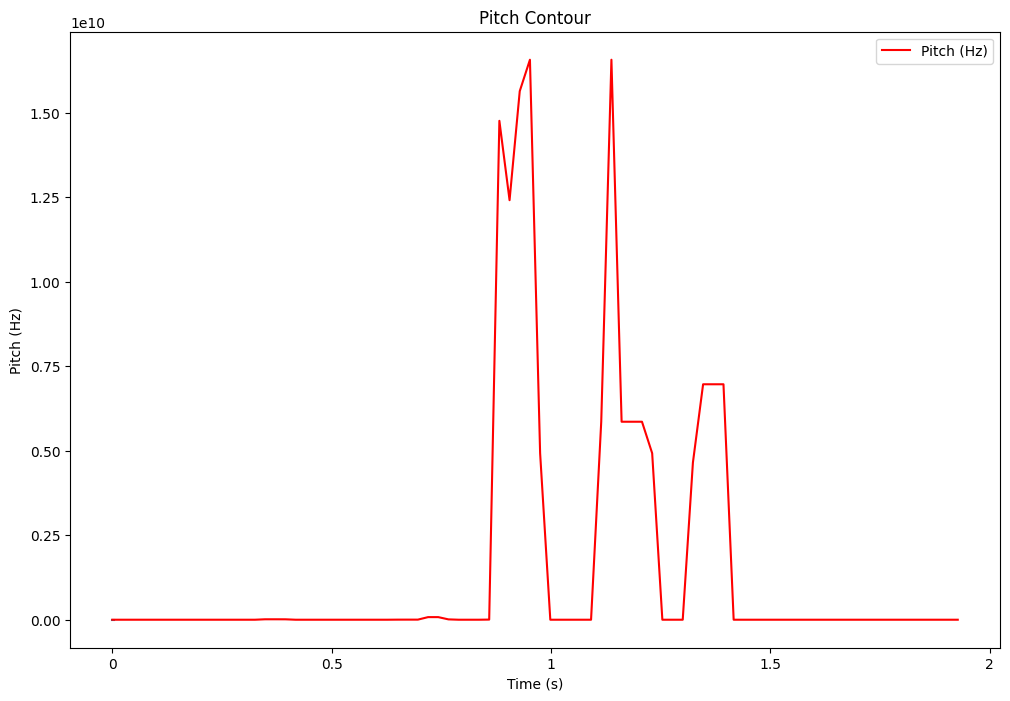

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

def get_pitch_contour(audio_file, hop_size=512, threshold=0.1):
    # Load the audio file
    y, sr = librosa.load("/content/1001_IEO_ANG_HI.wav")

    # Use the YIN pitch estimator
    harmonic, percussive = librosa.effects.hpss(y)
    pitches, magnitudes = librosa.core.piptrack(y=harmonic, sr=sr, hop_length=hop_size)

    # Extract the pitch from the pitch tracking matrix
    pitches = np.argmax(pitches, axis=0)
    pitches = librosa.core.midi_to_hz(pitches)

    # Filter out pitches with low magnitudes
    if pitches.shape == magnitudes.shape:
        pitches[magnitudes < threshold] = np.nan
    else:
        print("Shapes of 'pitches' and 'magnitudes' are not compatible.")

    return pitches

def plot_pitch_contour(pitches, sr=22050):
    times = librosa.times_like(pitches, sr=sr)

    plt.figure(figsize=(12, 8))
    librosa.display.waveshow(np.zeros_like(pitches), sr=sr)
    plt.plot(times, pitches, label='Pitch (Hz)', color='r')
    plt.title('Pitch Contour')
    plt.xlabel('Time (s)')
    plt.ylabel('Pitch (Hz)')
    plt.legend()
    plt.show()


# Example usage
audio_file_path = '/content/1001_IEO_ANG_HI.wav'
pitch_contour = get_pitch_contour(audio_file_path)
plot_pitch_contour(pitch_contour)
plt.show()  # Don't forget to include this line to actually display the plot


Shapes of 'pitches' and 'magnitudes' are not compatible.
Shapes of 'pitches' and 'magnitudes' are not compatible.
Shapes of 'pitches' and 'magnitudes' are not compatible.


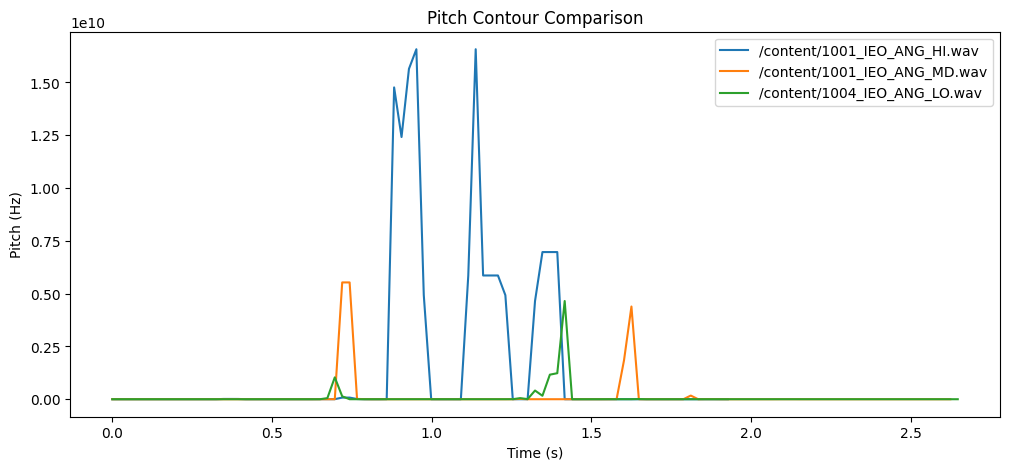

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

def get_pitch_contour(audio_file, hop_size=512, threshold=0.1):
    # Load the audio file
    y, sr = librosa.load(audio_file)

    # Use the YIN pitch estimator
    harmonic, percussive = librosa.effects.hpss(y)
    pitches, magnitudes = librosa.core.piptrack(y=harmonic, sr=sr, hop_length=hop_size)

    # Extract the pitch from the pitch tracking matrix
    pitches = np.argmax(pitches, axis=0)
    pitches = librosa.core.midi_to_hz(pitches)

    # Filter out pitches with low magnitudes
    if pitches.shape == magnitudes.shape:
        pitches[magnitudes < threshold] = np.nan
    else:
        print("Shapes of 'pitches' and 'magnitudes' are not compatible.")

    return pitches

def plot_pitch_contour(pitches, sr=22050, label=None):
    times = librosa.times_like(pitches, sr=sr)

    plt.plot(times, pitches, label=label)

# Example usage for multiple audio files
audio_files = ['/content/1001_IEO_ANG_HI.wav', '/content/1001_IEO_ANG_MD.wav', '/content/1004_IEO_ANG_LO.wav']

plt.figure(figsize=(12, 5))

for audio_file in audio_files:
    pitch_contour = get_pitch_contour(audio_file)
    plot_pitch_contour(pitch_contour, label=audio_file)

plt.title('Pitch Contour Comparison')
plt.xlabel('Time (s)')
plt.ylabel('Pitch (Hz)')
plt.legend()
plt.show()


Formants Contour

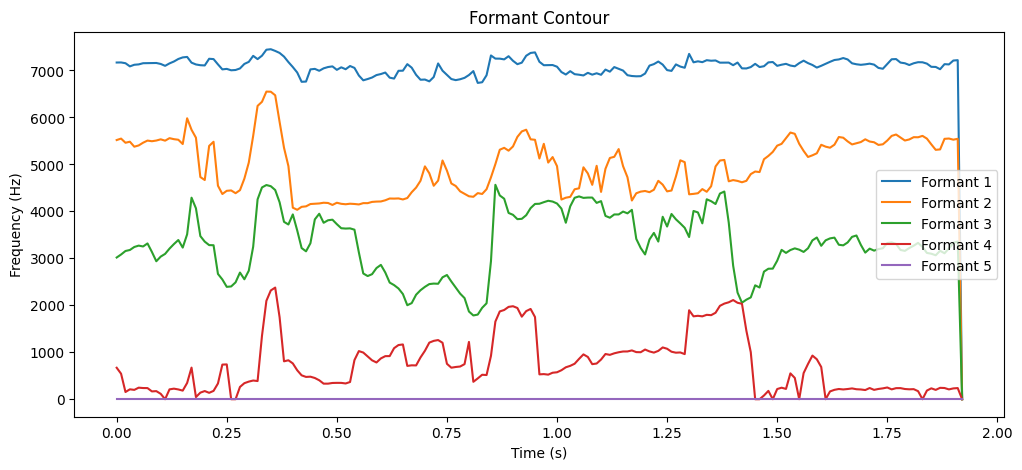

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

def get_formant_contour(audio_file, n_formants=5, window_size=25, hop_size=10):
    # Load the audio file
    y, sr = librosa.load('/content/1001_IEO_ANG_HI.wav')

    # Define the window size and hop size for LPC analysis (in milliseconds)
    n_fft = int((window_size / 1000) * sr)
    hop_length = int((hop_size / 1000) * sr)

    # Initialize an array to store formant frequencies over time
    formants = np.zeros((n_formants, len(y) // hop_length))

    # Iterate over frames and estimate formants using LPC
    for i in range(0, len(y) - n_fft, hop_length):
        frame = y[i:i + n_fft]
        a = librosa.lpc(frame, order=n_formants * 2 - 1)
        roots = np.roots(a)
        roots = roots[np.imag(roots) >= 0]  # Retain only the roots with non-negative imaginary parts
        frequencies = np.arctan2(np.imag(roots), np.real(roots)) * (sr / (2 * np.pi))
        frequencies = np.sort(frequencies)[::-1]  # Sort formant frequencies in descending order
        formants[:, i // hop_length] = frequencies[:n_formants]

    return formants

def plot_formant_contour(formants, hop_size=10, sr=22050):
    times = np.arange(0, formants.shape[1] * (hop_size / 1000), hop_size / 1000)

    plt.figure(figsize=(12, 5))
    for i in range(formants.shape[0]):
        plt.plot(times, formants[i, :], label=f'Formant {i + 1}')

    plt.title('Formant Contour')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.legend()
    plt.show()

# Example usage
audio_file_path = '/content/1001_IEO_ANG_HI.wav'
formant_contour = get_formant_contour(audio_file_path)
plot_formant_contour(formant_contour)

In [ ]:
!pip install praat-parselmouth

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 19.5 MB/s eta 0:00:00


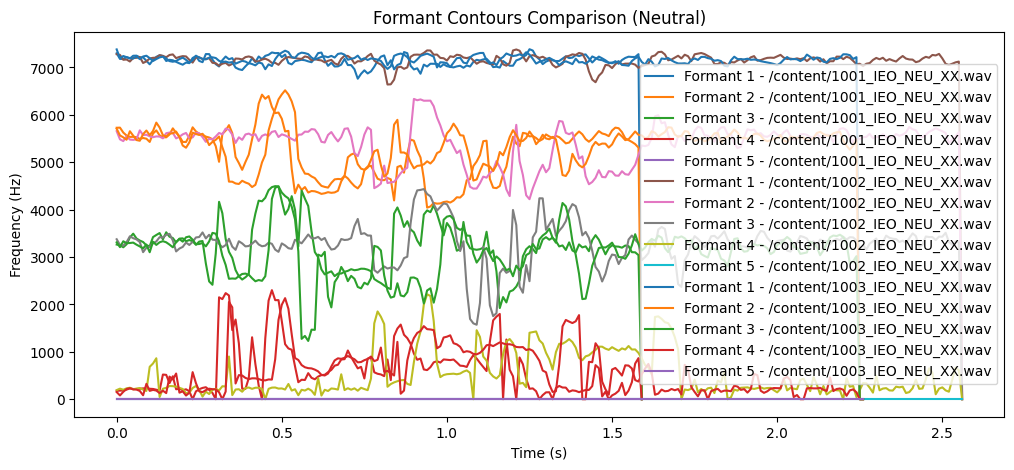

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

def get_formant_contour(audio_file, n_formants=5, window_size=25, hop_size=10):
    y, sr = librosa.load(audio_file)

    n_fft = int((window_size / 1000) * sr)
    hop_length = int((hop_size / 1000) * sr)

    formants = np.zeros((n_formants, len(y) // hop_length))

    for i in range(0, len(y) - n_fft, hop_length):
        frame = y[i:i + n_fft]
        a = librosa.lpc(frame, order=n_formants * 2 - 1)
        roots = np.roots(a)
        roots = roots[np.imag(roots) >= 0]
        frequencies = np.arctan2(np.imag(roots), np.real(roots)) * (sr / (2 * np.pi))
        frequencies = np.sort(frequencies)[::-1]
        formants[:, i // hop_length] = frequencies[:n_formants]

    return formants

def plot_formant_contours(audio_files, n_formants=5, window_size=25, hop_size=10):
    plt.figure(figsize=(12, 5))

    for audio_file in audio_files:
        formant_contour = get_formant_contour(audio_file, n_formants, window_size, hop_size)
        times = np.arange(0, formant_contour.shape[1] * (hop_size / 1000), hop_size / 1000)

        for i in range(formant_contour.shape[0]):
            plt.plot(times, formant_contour[i, :], label=f'Formant {i + 1} - {audio_file}')

    plt.title('Formant Contours Comparison (Neutral)')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.legend()
    plt.show()

# Example usage for multiple audio files
audio_files = ['/content/1001_IEO_NEU_XX.wav', '/content/1002_IEO_NEU_XX.wav', '/content/1003_IEO_NEU_XX.wav']
plot_formant_contours(audio_files)


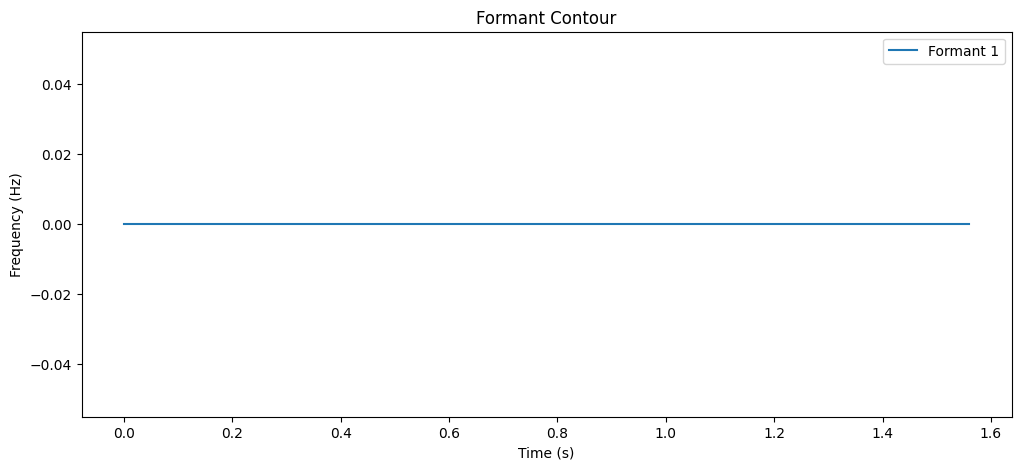

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

def get_formant_contour(audio_file, n_formants=1, window_size=25, hop_size=10):
    # Load the audio file
    y, sr = librosa.load(audio_file)

    # Define the window size and hop size for LPC analysis (in milliseconds)
    n_fft = int((window_size / 1000) * sr)
    hop_length = int((hop_size / 1000) * sr)

    # Initialize an array to store formant frequencies over time
    formant = np.zeros((n_formants, len(y) // hop_length))

    # Iterate over frames and estimate formants using LPC
    for i in range(0, len(y) - n_fft, hop_length):
        frame = y[i:i + n_fft]
        a = librosa.lpc(frame, order=n_formants * 2 - 1)
        roots = np.roots(a)
        roots = roots[np.imag(roots) >= 0]  # Retain only the roots with non-negative imaginary parts
        frequencies = np.arctan2(np.imag(roots), np.real(roots)) * (sr / (2 * np.pi))
        frequencies = np.sort(frequencies)[::-1]  # Sort formant frequencies in descending order
        formant[:, i // hop_length] = frequencies[:n_formants]

    return formant

def plot_formant_contour(formant, hop_size=10, sr=22050):
    times = np.arange(0, formant.shape[1] * (hop_size / 1000), hop_size / 1000)

    plt.figure(figsize=(12, 5))
    plt.plot(times, formant[0, :], label='Formant 1')

    plt.title('Formant Contour')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.legend()
    plt.show()

# Example usage
audio_file_path = '/content/1001_IEO_FEA_HI.wav'
formant_contour = get_formant_contour(audio_file_path, n_formants=1)
plot_formant_contour(formant_contour)


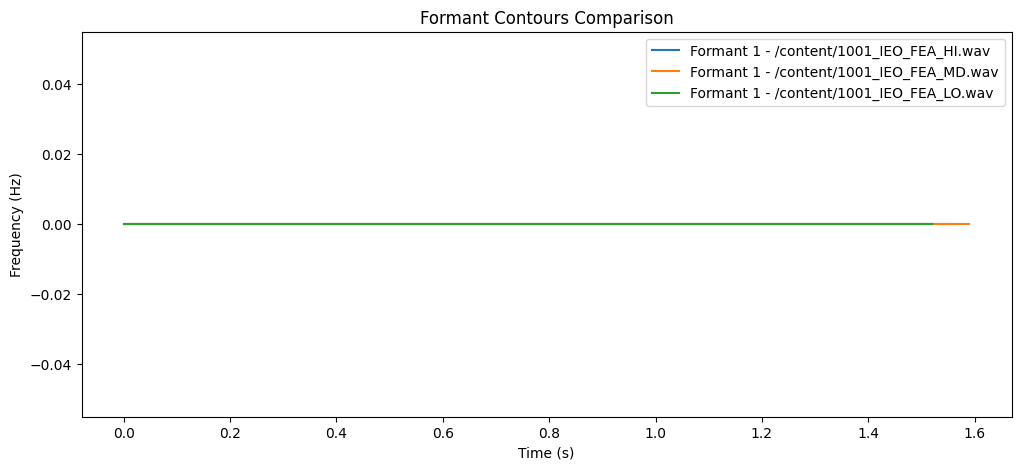

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

def get_formant_contour(audio_file, n_formants=1, window_size=25, hop_size=10):
    y, sr = librosa.load(audio_file)

    n_fft = int((window_size / 1000) * sr)
    hop_length = int((hop_size / 1000) * sr)

    formant = np.zeros((n_formants, len(y) // hop_length))

    for i in range(0, len(y) - n_fft, hop_length):
        frame = y[i:i + n_fft]
        a = librosa.lpc(frame, order=n_formants * 2 - 1)
        roots = np.roots(a)
        roots = roots[np.imag(roots) >= 0]
        frequencies = np.arctan2(np.imag(roots), np.real(roots)) * (sr / (2 * np.pi))
        frequencies = np.sort(frequencies)[::-1]
        formant[:, i // hop_length] = frequencies[:n_formants]

    return formant

def plot_formant_contours(audio_files, n_formants=1, window_size=25, hop_size=10):
    plt.figure(figsize=(12, 5))

    for audio_file in audio_files:
        formant_contour = get_formant_contour(audio_file, n_formants, window_size, hop_size)
        times = np.arange(0, formant_contour.shape[1] * (hop_size / 1000), hop_size / 1000)

        plt.plot(times, formant_contour[0, :], label=f'Formant 1 - {audio_file}')

    plt.title('Formant Contours Comparison')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.legend()
    plt.show()

# Example usage for multiple audio files
audio_files = ['/content/1001_IEO_FEA_HI.wav', '/content/1001_IEO_FEA_MD.wav', '/content/1001_IEO_FEA_LO.wav']
plot_formant_contours(audio_files)


Database Analysis

Seaborn

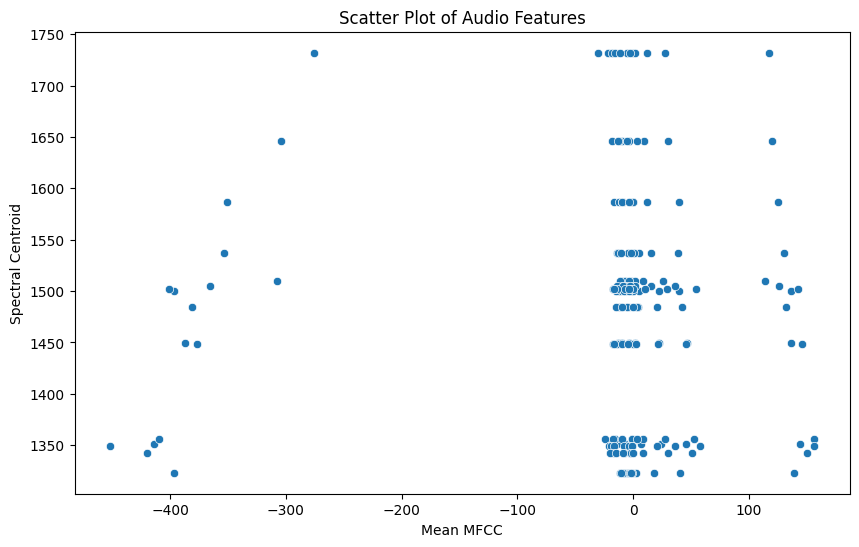

In [ ]:
import os
import librosa
import librosa.display
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Function to extract audio features
def extract_features(audio_file):
    y, sr = librosa.load(audio_file)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)[0]

    return {
        'audio_file': audio_file,
        'mean_mfcc': np.mean(mfccs, axis=1).tolist(),  # Convert to list
        'spectral_centroid': np.mean(spectral_centroid).tolist(),  # Convert to list
    }

# Directory containing audio files
audio_directory = '/content/sample_data/Database'

# List to store feature dictionaries
feature_list = []

# Iterate through audio files in the directory
for filename in os.listdir(audio_directory):
    if filename.endswith('.wav'):
        audio_file_path = os.path.join(audio_directory, filename)
        features = extract_features(audio_file_path)
        feature_list.append(features)

# Create a DataFrame from the feature list
df = pd.DataFrame(feature_list)

# Visualize the data using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mean_mfcc', y='spectral_centroid', data=df.apply(pd.Series.explode))
plt.title('Scatter Plot of Audio Features')
plt.xlabel('Mean MFCC')
plt.ylabel('Spectral Centroid')
plt.show()


In [ ]:
from google.colab import files

# Prompt user to upload a folder
uploaded = files.upload()

Saving 1001_IEO_ANG_HI.wav to 1001_IEO_ANG_HI (1).wav
Saving 1001_IEO_ANG_LO.wav to 1001_IEO_ANG_LO (1).wav
Saving 1001_IEO_ANG_MD.wav to 1001_IEO_ANG_MD (1).wav
Saving 1001_IEO_DIS_HI.wav to 1001_IEO_DIS_HI (1).wav
Saving 1001_IEO_DIS_LO.wav to 1001_IEO_DIS_LO (1).wav
Saving 1001_IEO_DIS_MD.wav to 1001_IEO_DIS_MD (1).wav
Saving 1001_IEO_FEA_HI.wav to 1001_IEO_FEA_HI (1).wav
Saving 1001_IEO_FEA_LO.wav to 1001_IEO_FEA_LO (1).wav
Saving 1001_IEO_FEA_MD.wav to 1001_IEO_FEA_MD (1).wav
Saving 1001_IEO_HAP_HI.wav to 1001_IEO_HAP_HI (1).wav
Saving 1001_IEO_HAP_LO.wav to 1001_IEO_HAP_LO (1).wav
Saving 1001_IEO_HAP_MD.wav to 1001_IEO_HAP_MD (1).wav
Saving 1001_IEO_NEU_XX.wav to 1001_IEO_NEU_XX (1).wav
Saving 1001_IEO_SAD_HI.wav to 1001_IEO_SAD_HI (1).wav
Saving 1001_IEO_SAD_LO.wav to 1001_IEO_SAD_LO (1).wav
Saving 1001_IEO_SAD_MD.wav to 1001_IEO_SAD_MD (1).wav


In [ ]:
from zipfile import ZipFile

In [ ]:
with ZipFile('/content/database.zip', 'r') as zipObj:
  zipObj.exctractall('/content/sample_data/Database')


AttributeError: 'ZipFile' object has no attribute 'exctractall'

In [ ]:
!pip install patool

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 3.4 MB/s eta 0:00:00


In [ ]:
import patoolib
patoolib.extract_archive('/content/angry.zip')

INFO patool: Extracting /content/angry.zip ...
INFO:patool:Extracting /content/angry.zip ...
INFO patool: running /usr/bin/7z x -o./Unpack_2g9kcoka -- /content/angry.zip
INFO:patool:running /usr/bin/7z x -o./Unpack_2g9kcoka -- /content/angry.zip
INFO patool:     with input=''
INFO:patool:    with input=''
INFO patool: ... /content/angry.zip extracted to `angry' (multiple files in root).
INFO:patool:... /content/angry.zip extracted to `angry' (multiple files in root).


'angry'

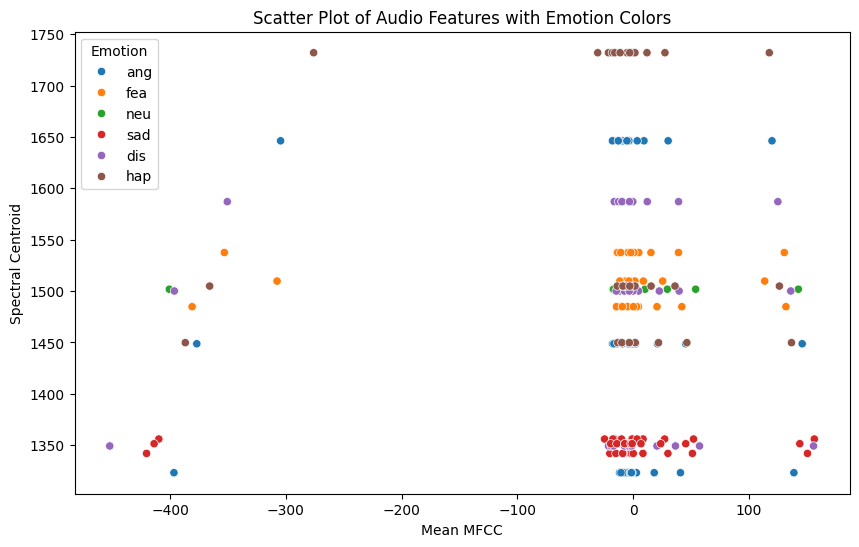

In [ ]:
import os
import librosa
import librosa.display
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Function to extract audio features
def extract_features(audio_file, emotion):
    y, sr = librosa.load(audio_file)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)[0]

    return {
        'audio_file': audio_file,
        'mean_mfcc': np.mean(mfccs, axis=1).tolist(),
        'spectral_centroid': np.mean(spectral_centroid).tolist(),
        'emotion': emotion,
    }

# Directory containing audio files
audio_directory = '/content/Database'

# List to store feature dictionaries
feature_list = []

# Iterate through audio files in the directory
for filename in os.listdir(audio_directory):
    if filename.endswith('.wav'):
        audio_file_path = os.path.join(audio_directory, filename)

        # Extracting emotion label from the filename
        emotion = filename.split('_')[-2].lower()  # Assuming "numeric_sequence_emotion_label_quality.wav" format

        features = extract_features(audio_file_path, emotion)
        feature_list.append(features)

# Create a DataFrame from the feature list
df = pd.DataFrame(feature_list)

# Visualize the data using Seaborn with different colors for different emotions
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mean_mfcc', y='spectral_centroid', hue='emotion', data=df.apply(pd.Series.explode))
plt.title('Scatter Plot of Audio Features with Emotion Colors')
plt.xlabel('Mean MFCC')
plt.ylabel('Spectral Centroid')
plt.legend(title='Emotion')
plt.show()


Heatmap

<ipython-input-3-b4f73ae7580c>:46: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_x = df[selected_features_x].corr()
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


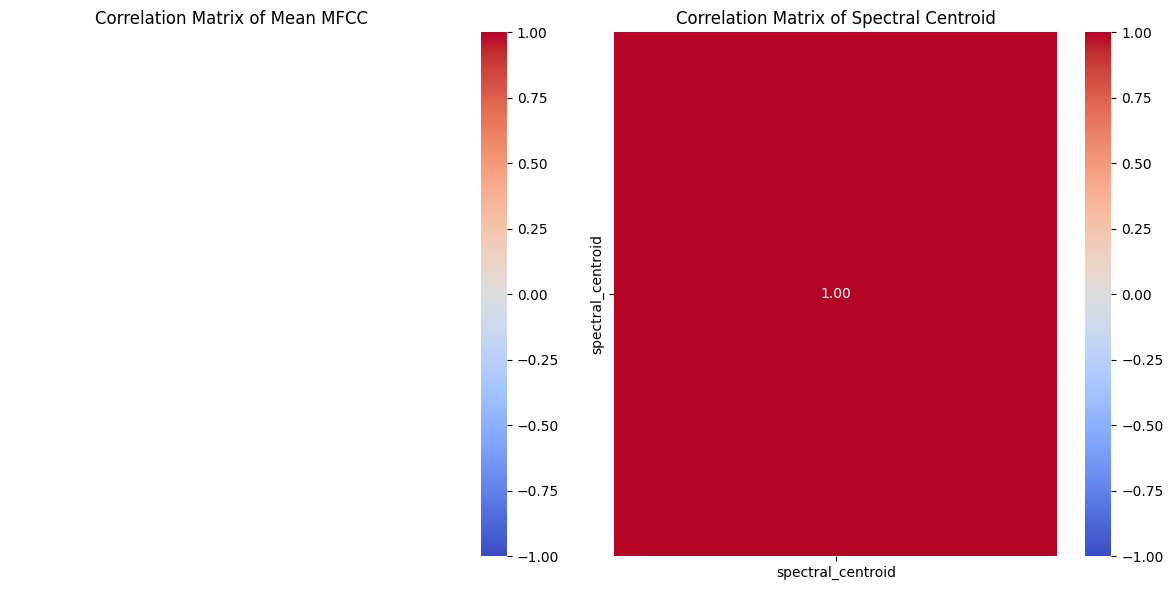

In [ ]:
import os
import librosa
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Function to extract audio features
def extract_features(audio_file, emotion):
    y, sr = librosa.load(audio_file)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)[0]

    return {
        'audio_file': audio_file,
        'mean_mfcc': np.mean(mfccs, axis=1),
        'spectral_centroid': np.mean(spectral_centroid),
        'emotion': emotion,
    }

# Directory containing audio files
audio_directory = '/content/Database'

# List to store feature dictionaries
feature_list = []

# Iterate through audio files in the directory
for filename in os.listdir(audio_directory):
    if filename.endswith('.wav'):
        audio_file_path = os.path.join(audio_directory, filename)

        # Extracting emotion label from the filename
        emotion = filename.split('_')[-2].lower()  # Assuming "numeric_sequence_emotion_label_quality.wav" format

        features = extract_features(audio_file_path, emotion)
        feature_list.append(features)

# Create a DataFrame from the feature list
df = pd.DataFrame(feature_list)

# Select features for the heatmap
selected_features_x = ['mean_mfcc']
selected_features_y = ['spectral_centroid']

# Create correlation matrices
correlation_matrix_x = df[selected_features_x].corr()
correlation_matrix_y = df[selected_features_y].corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(correlation_matrix_x, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix of Mean MFCC')

plt.subplot(1, 2, 2)
sns.heatmap(correlation_matrix_y, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix of Spectral Centroid')

plt.tight_layout()
plt.show()


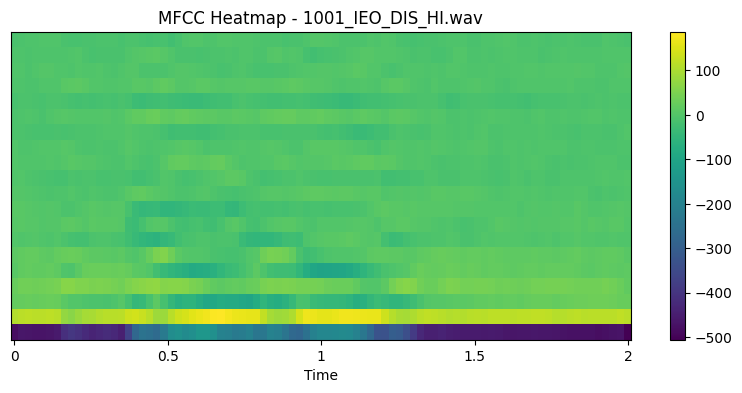

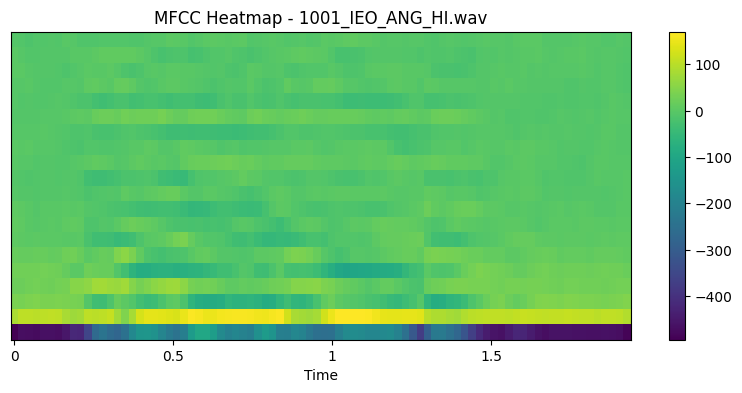

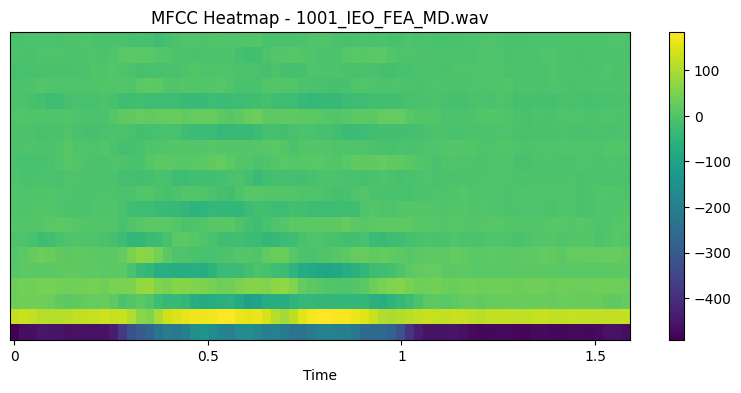

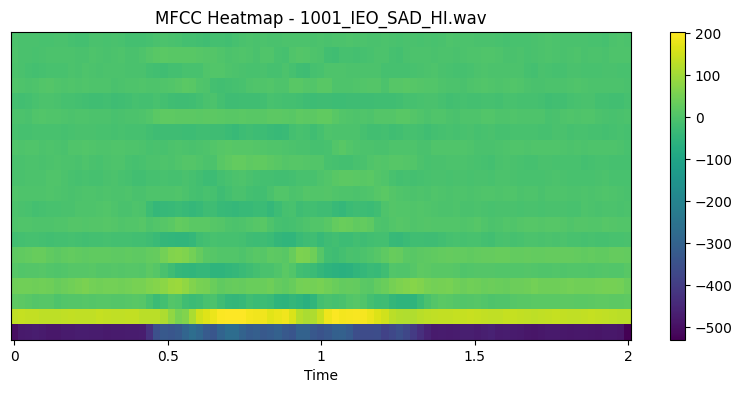

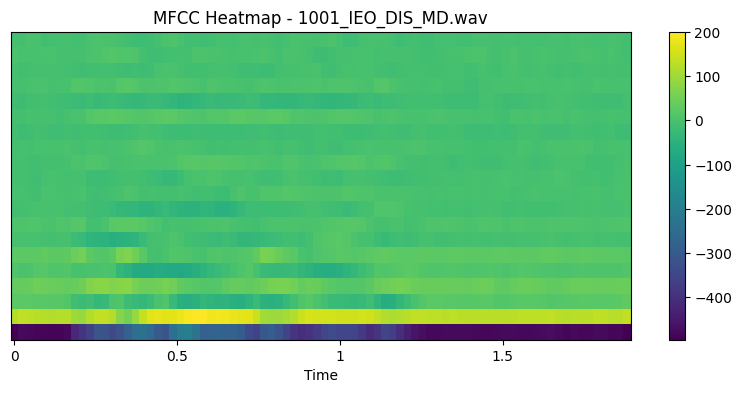

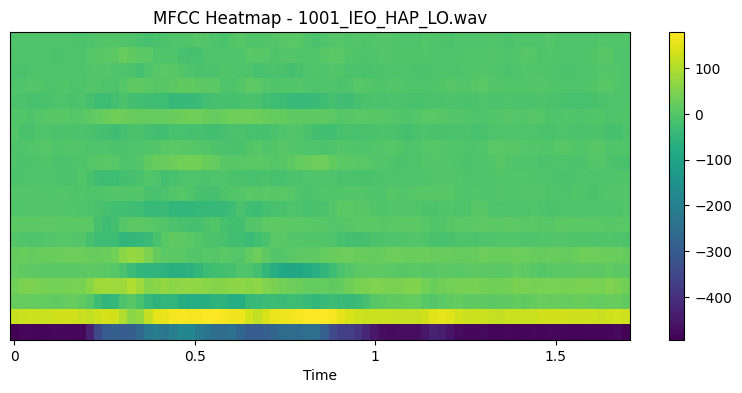

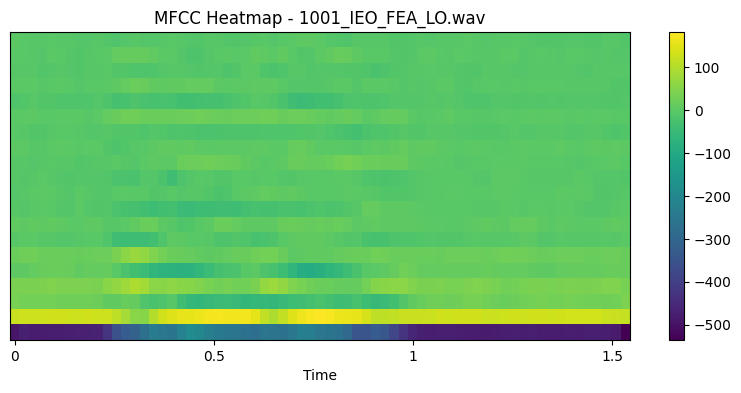

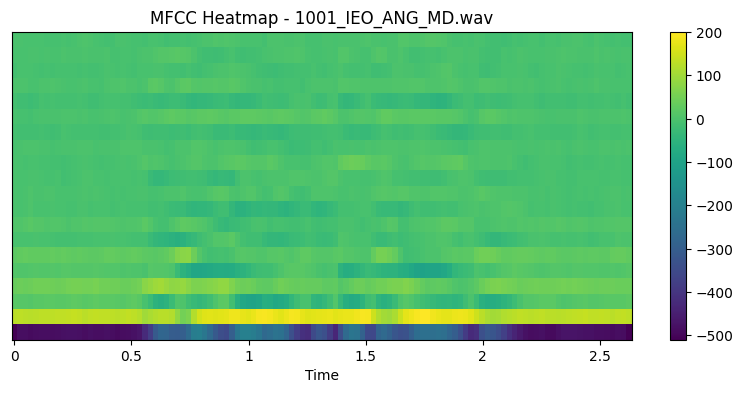

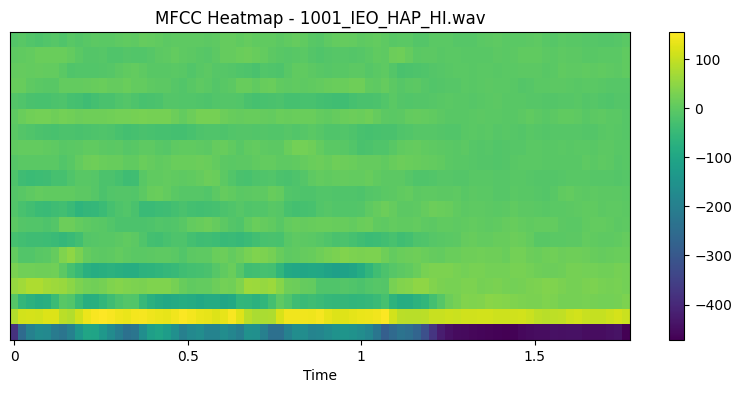

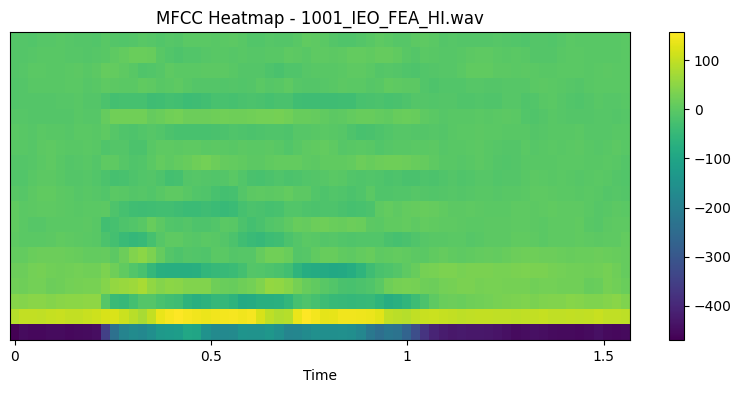

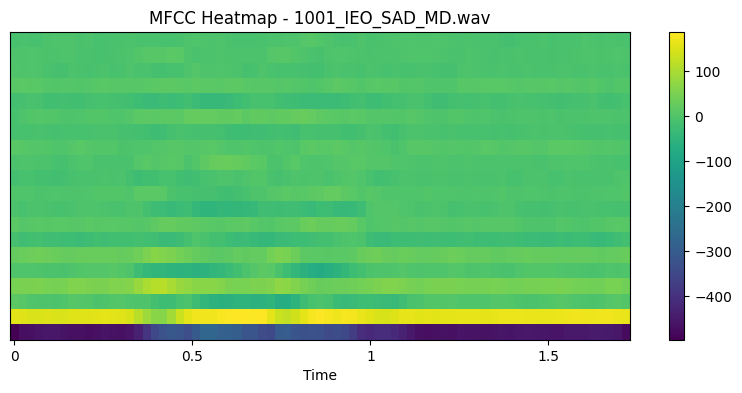

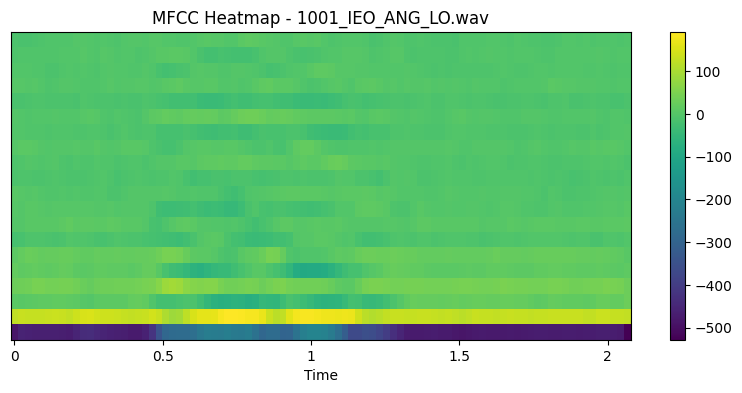

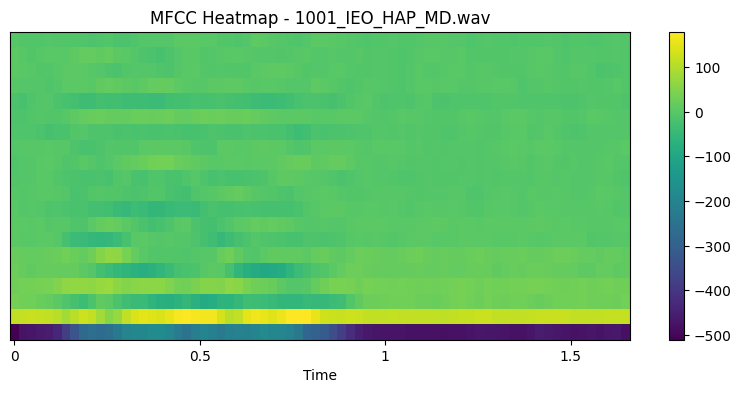

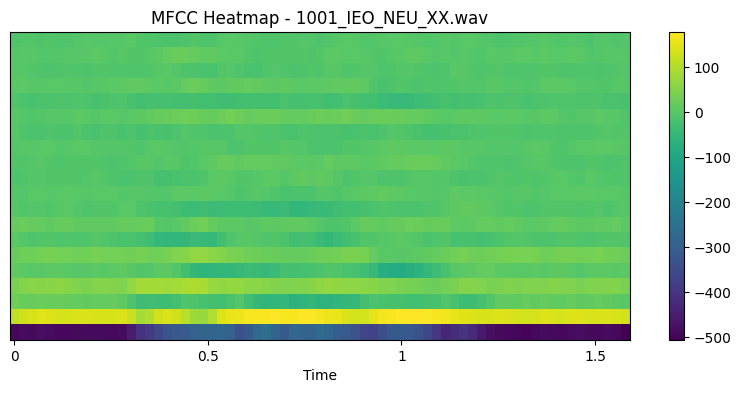

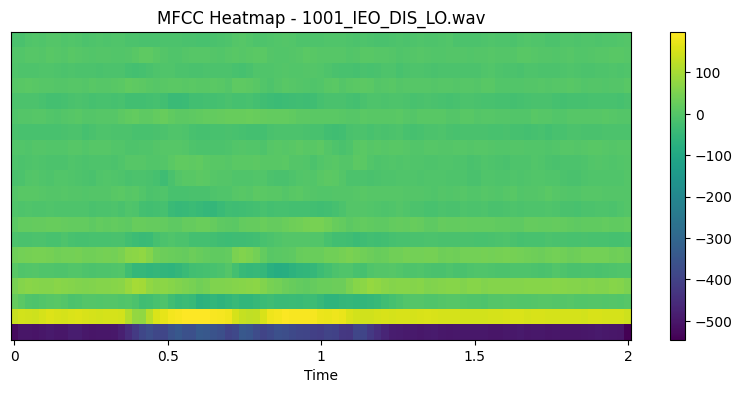

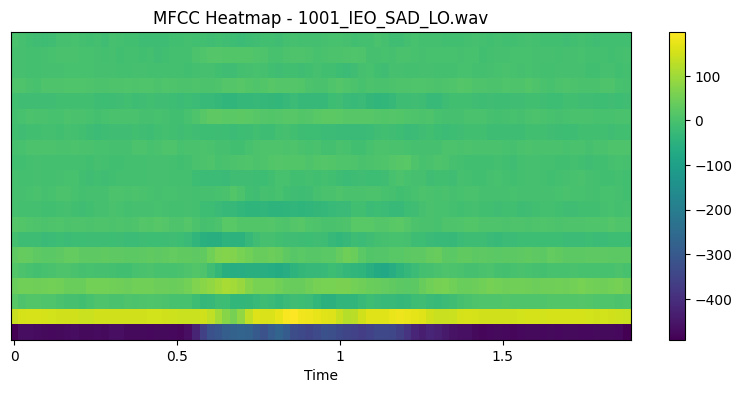

In [ ]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt

def create_audio_heatmap(audio_file):
    # Load audio file
    y, sr = librosa.load(audio_file)

    # Extract MFCCs
    mfccs = librosa.feature.mfcc(y=y, sr=sr)

    # Create heatmap
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfccs, x_axis='time', cmap='viridis')
    plt.colorbar()
    plt.title('MFCC Heatmap - {}'.format(os.path.basename(audio_file)))
    plt.show()

# Specify the directory containing audio files
audio_directory = '/content/Database'

# Iterate through audio files in the directory
for filename in os.listdir(audio_directory):
    if filename.endswith(".wav"):  # Adjust based on the audio file format you have
        audio_file_path = os.path.join(audio_directory, filename)
        create_audio_heatmap(audio_file_path)


Oscillogram

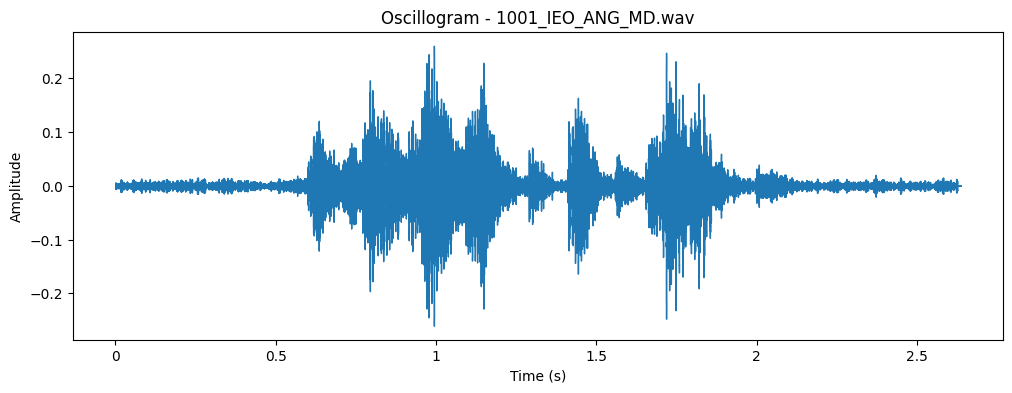

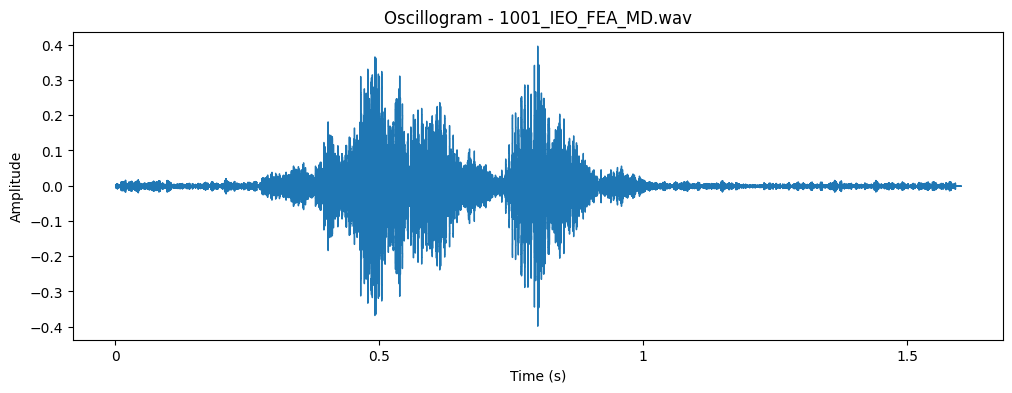

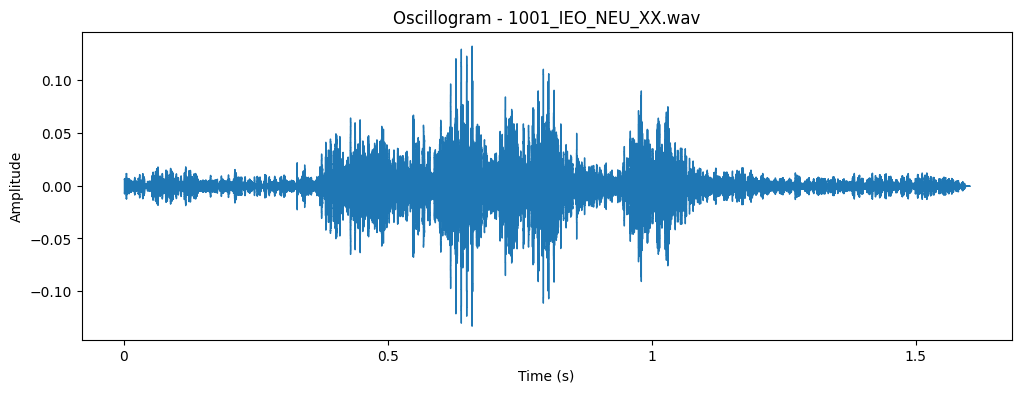

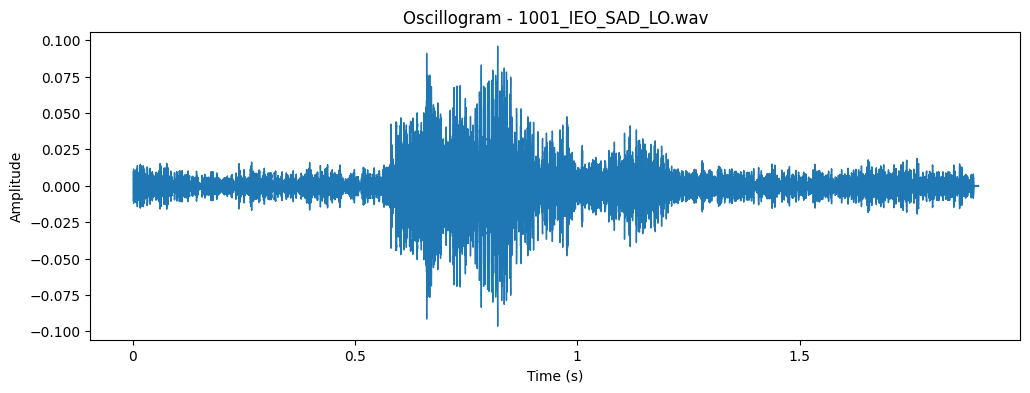

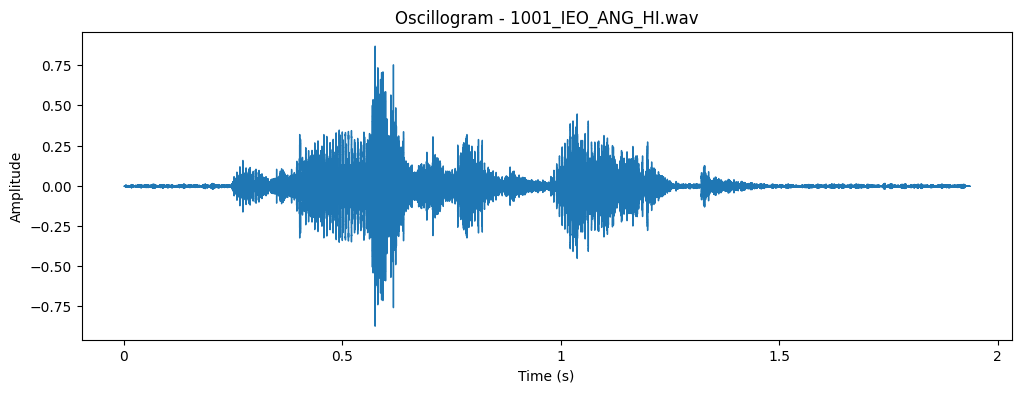

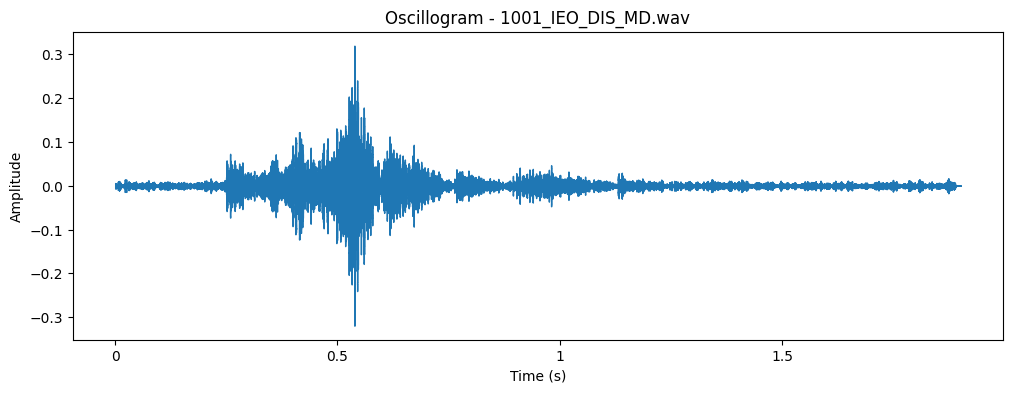

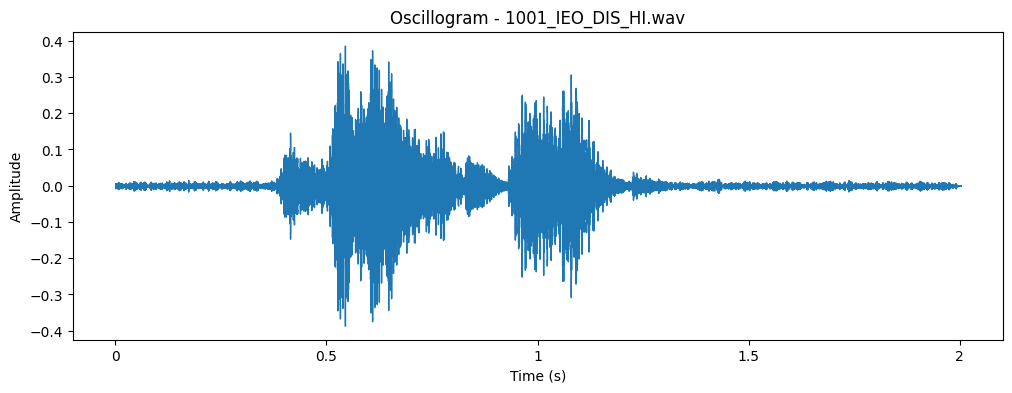

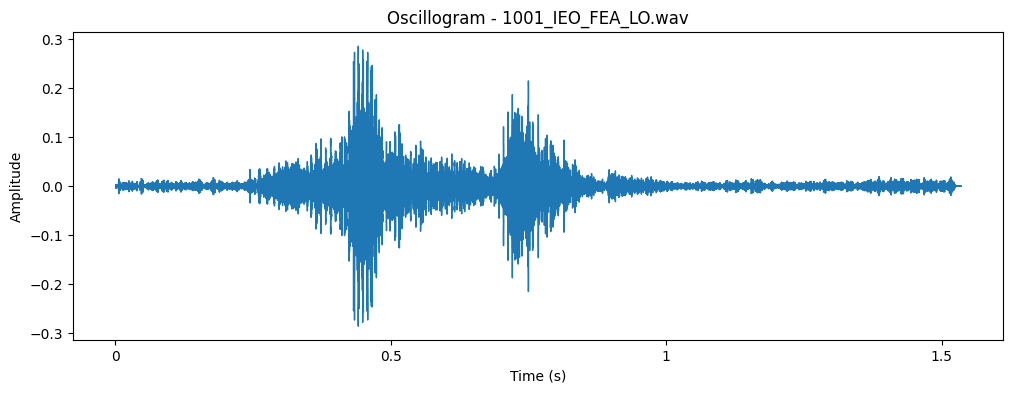

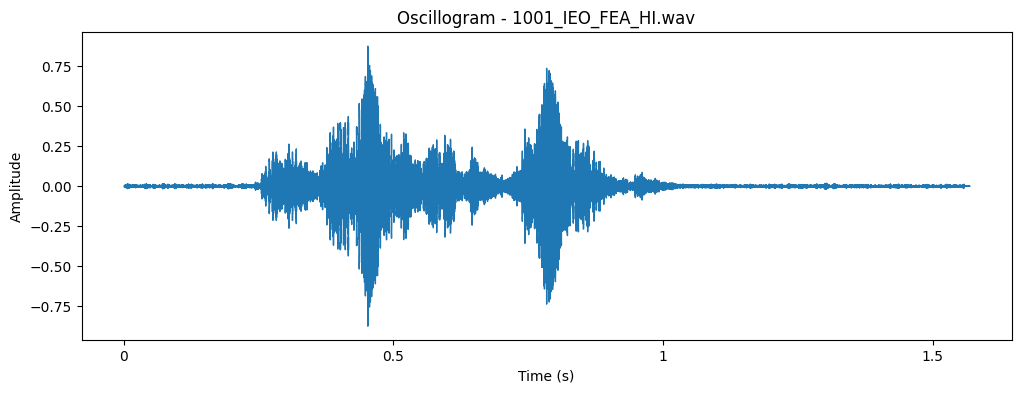

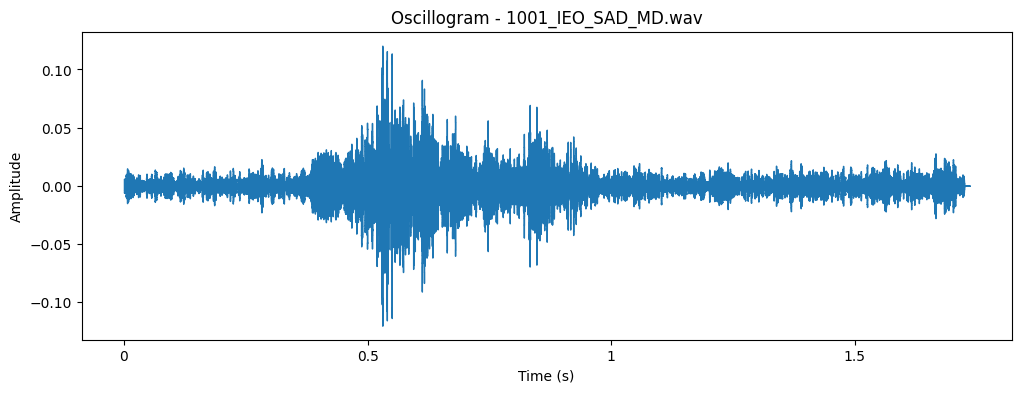

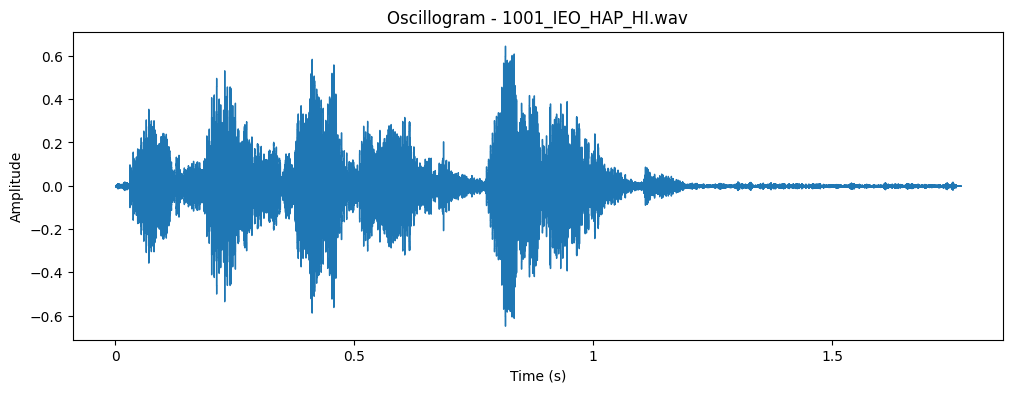

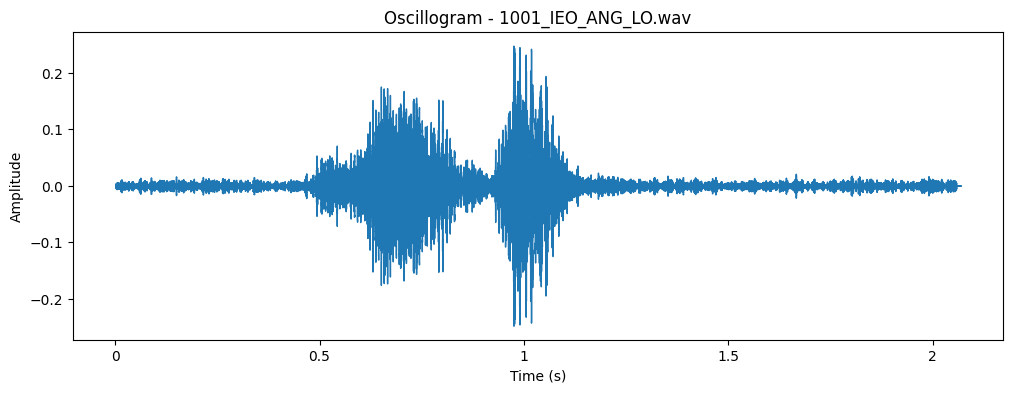

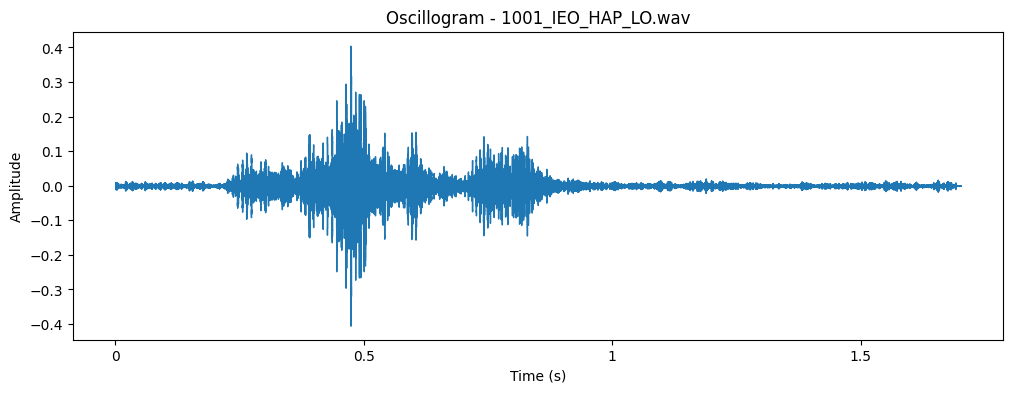

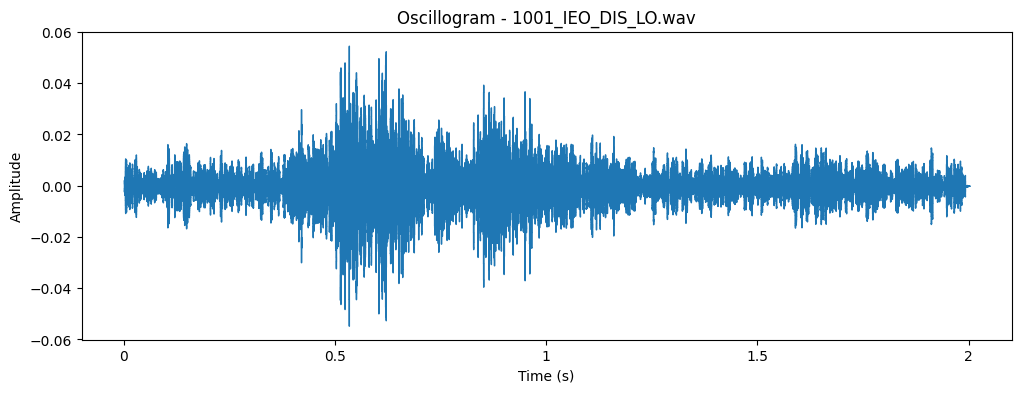

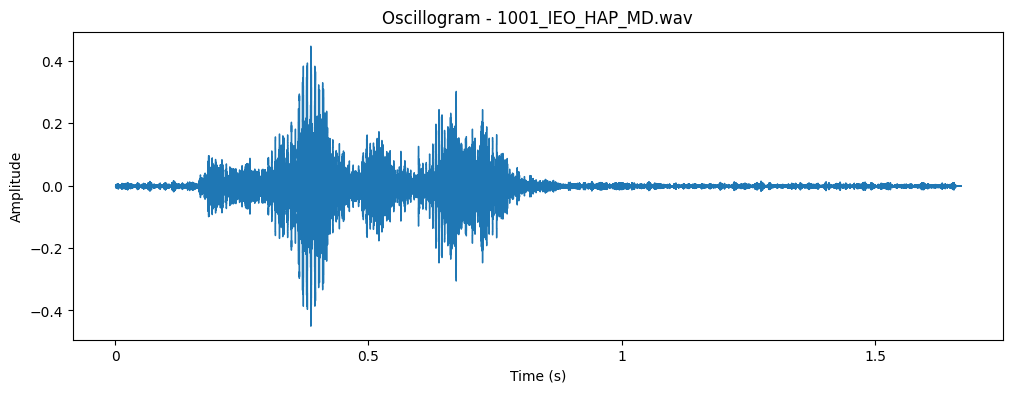

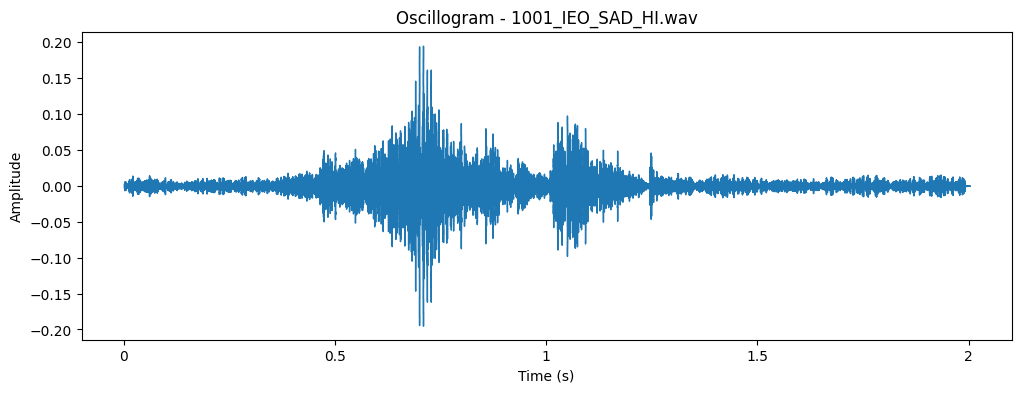

In [ ]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Function to plot the oscillogram of an audio file
def plot_oscillogram(audio_file):
    # Load the audio file
    y, sr = librosa.load(audio_file)

    # Create a time array for x-axis
    times = librosa.times_like(y)

    # Plot the oscillogram
    plt.figure(figsize=(12, 4))
    librosa.display.waveshow(y, sr=sr)
    plt.title(f'Oscillogram - {os.path.basename(audio_file)}')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

# Directory containing audio files
audio_directory = '/content/Database'

# Iterate through audio files in the directory
for filename in os.listdir(audio_directory):
    if filename.endswith('.wav'):
        audio_file_path = os.path.join(audio_directory, filename)
        plot_oscillogram(audio_file_path)


Spectrogram

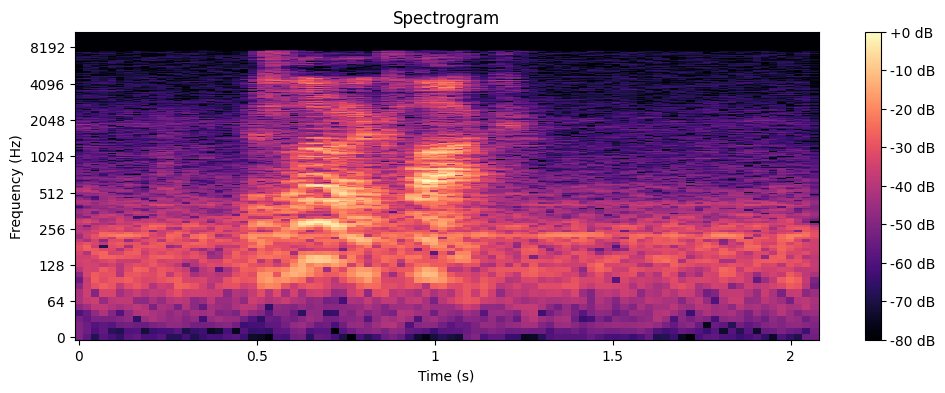

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Function to plot the spectrogram of an audio file
def plot_spectrogram(audio_file):
    # Load the audio file
    y, sr = librosa.load(audio_file)

    # Compute the short-time Fourier transform (STFT)
    D = librosa.stft(y)

    # Convert magnitude spectrogram to decibels
    DB = librosa.amplitude_to_db(np.abs(D), ref=np.max)

    # Plot the spectrogram
    plt.figure(figsize=(12, 4))
    librosa.display.specshow(DB, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.show()

# Example usage
audio_file_path = '/content/1001_IEO_ANG_LO.wav'
plot_spectrogram(audio_file_path)


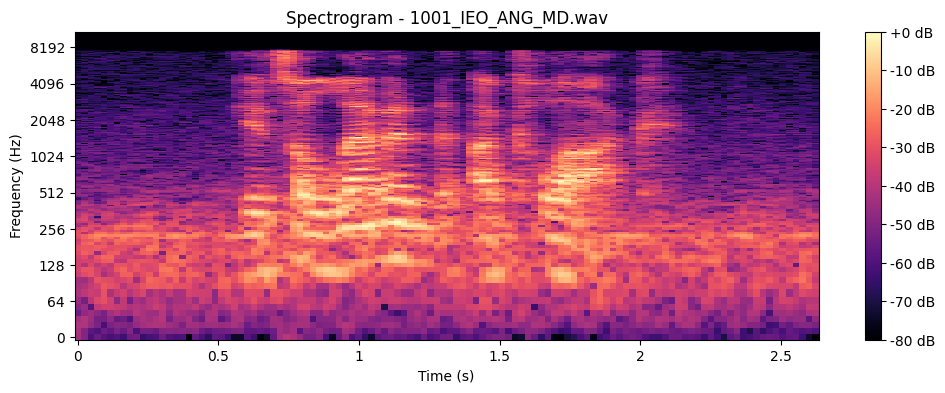

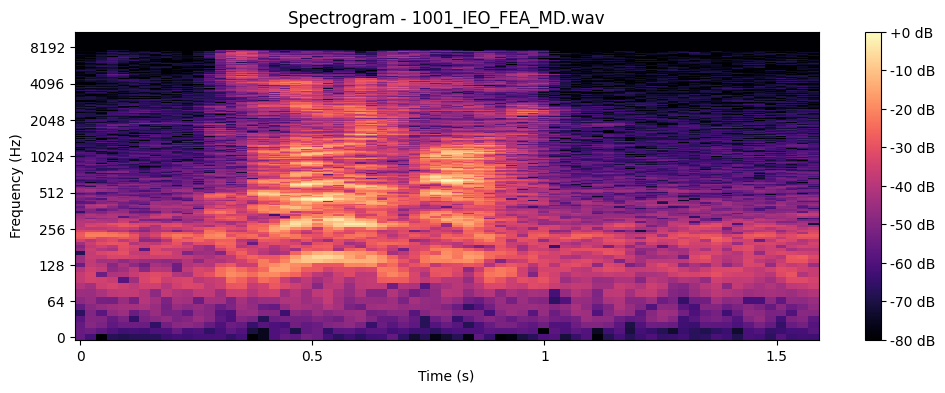

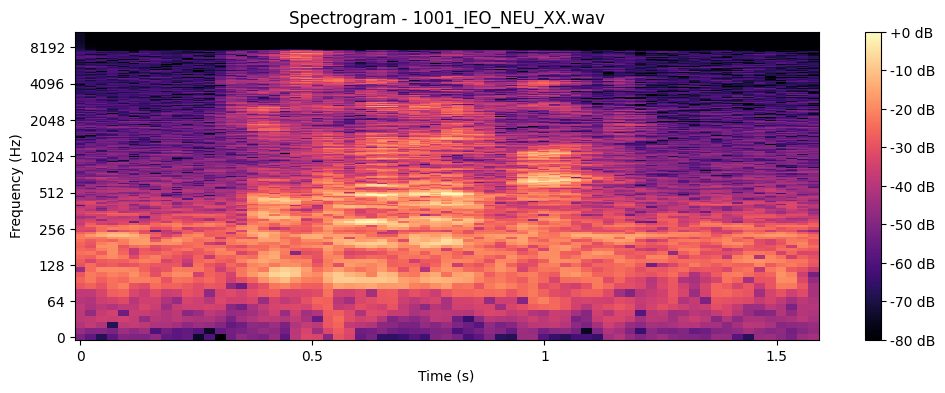

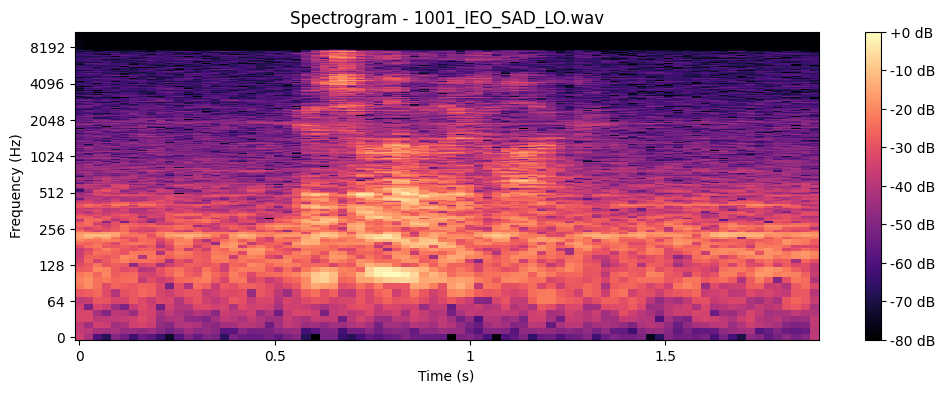

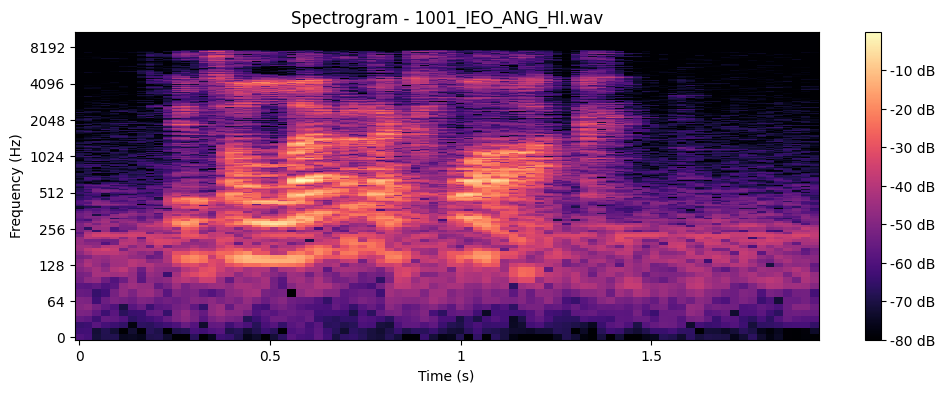

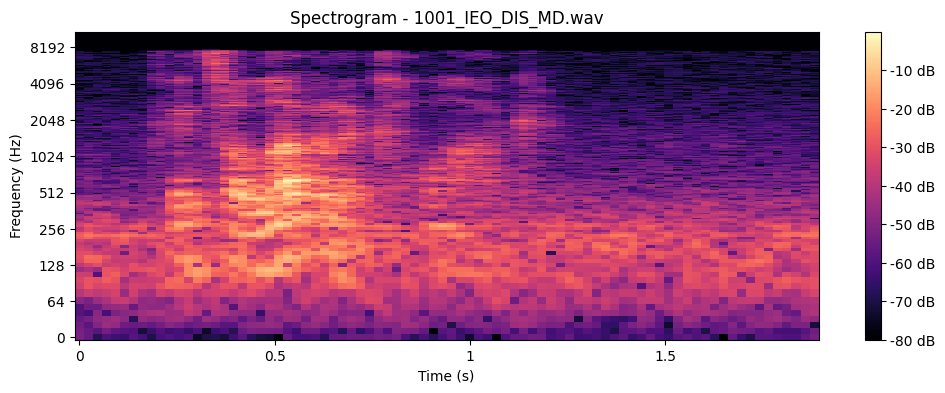

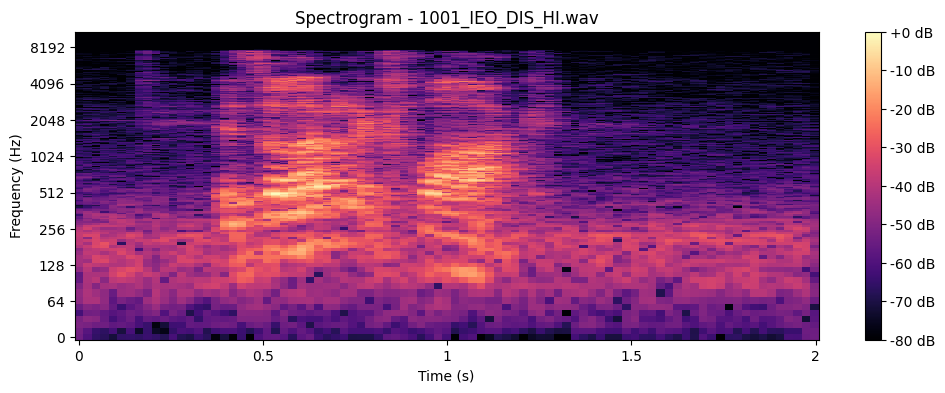

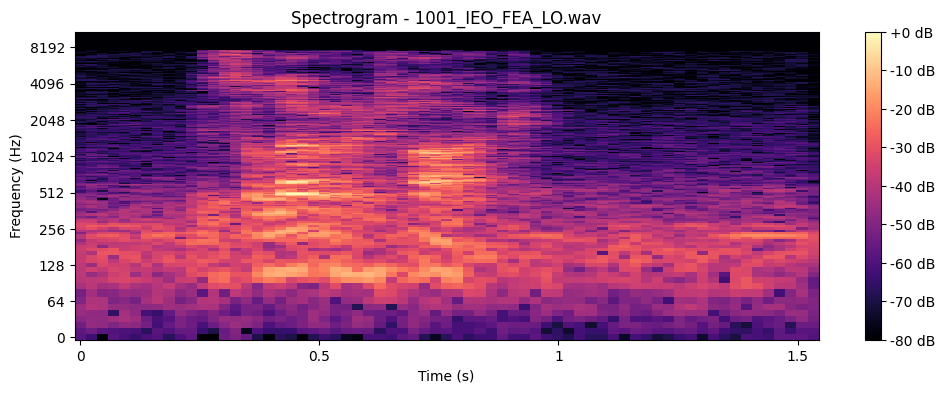

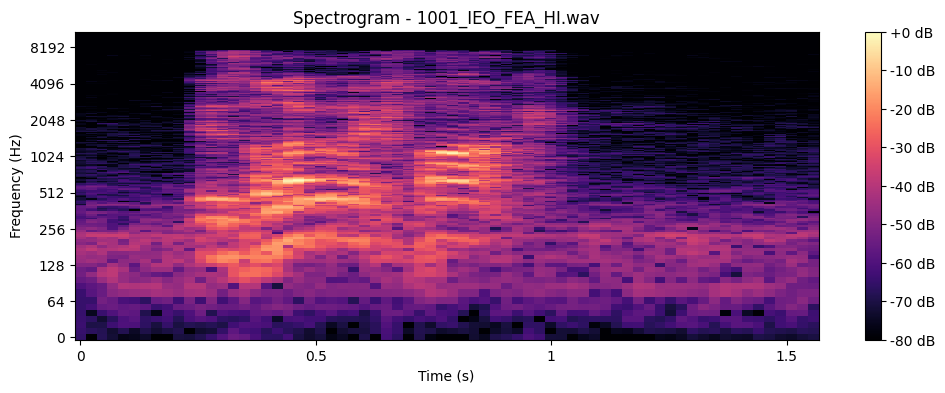

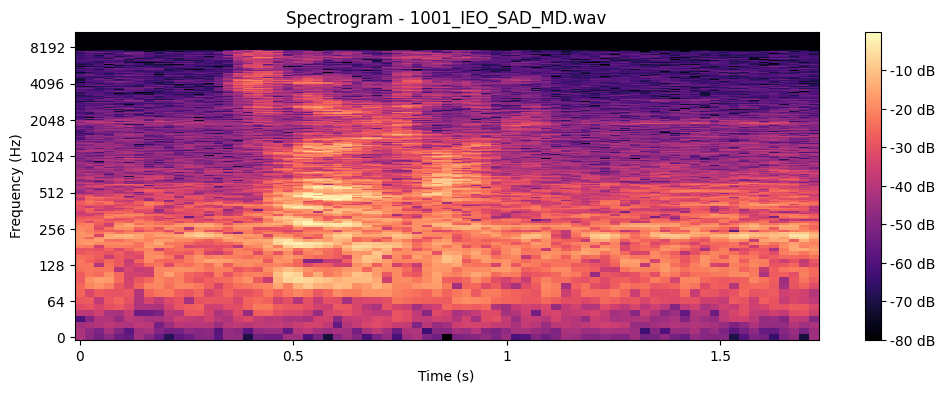

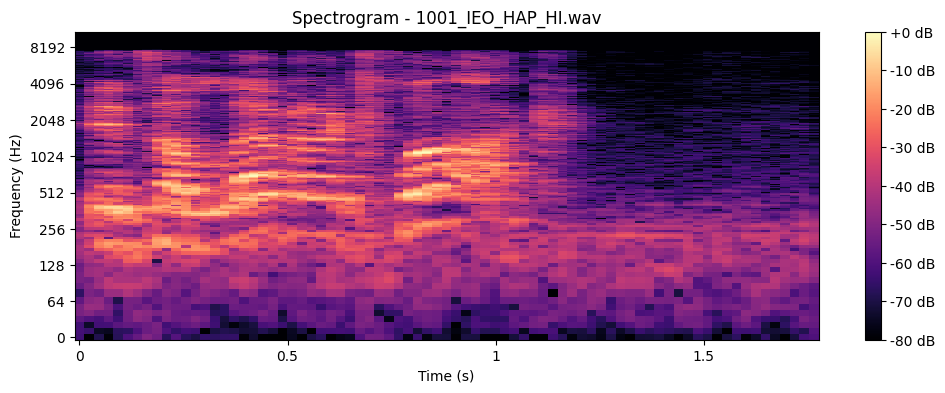

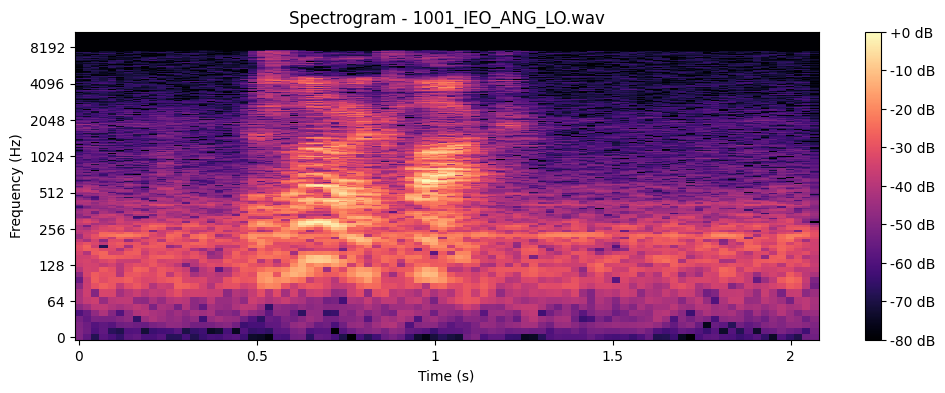

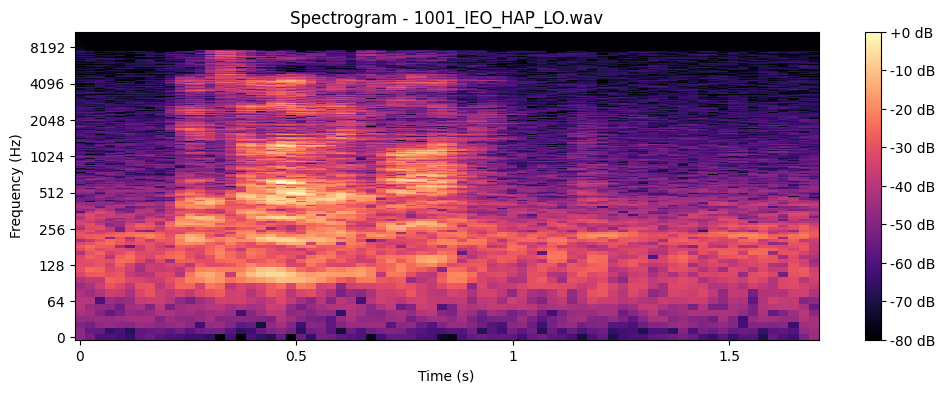

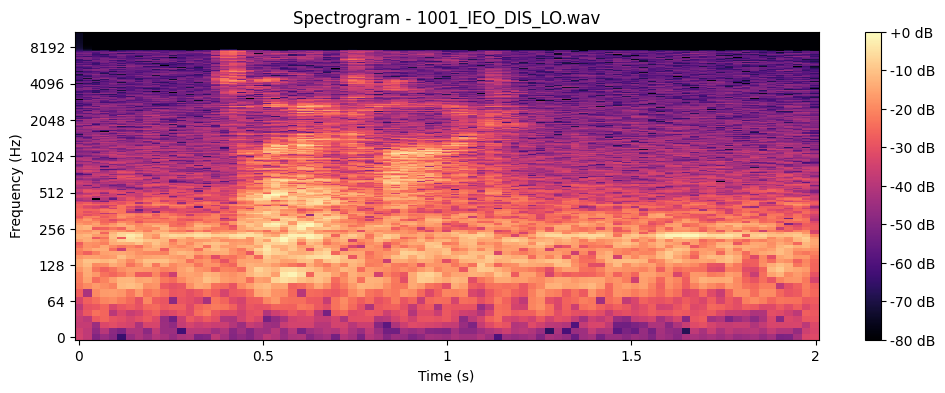

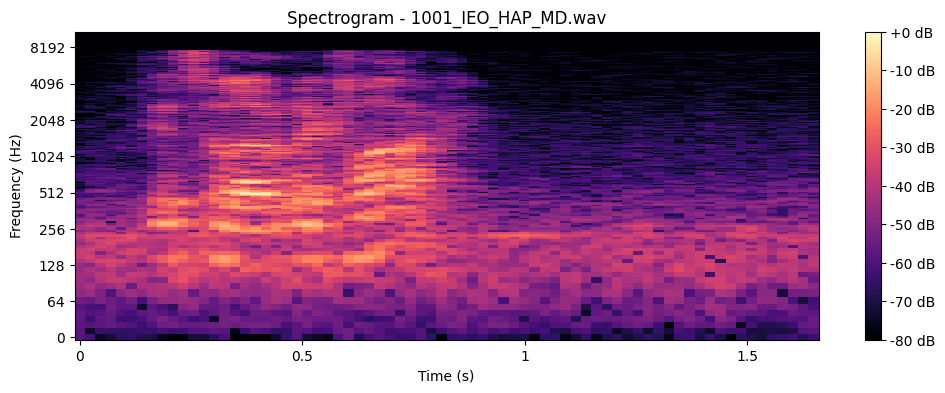

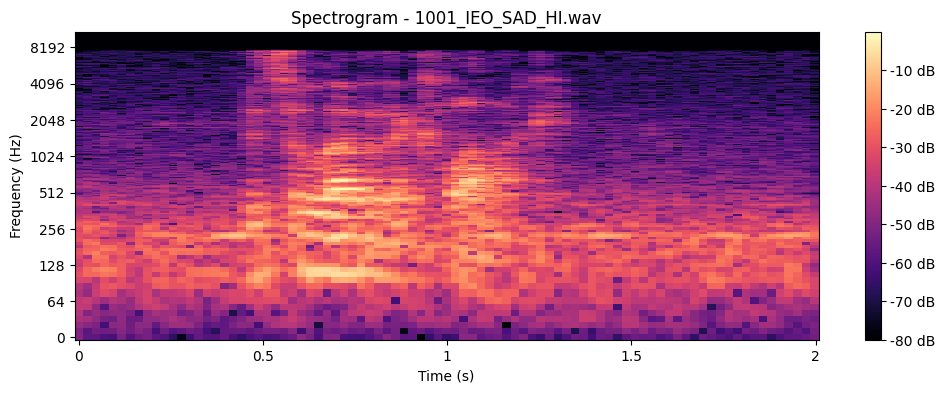

In [ ]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Function to plot the spectrogram of an audio file
def plot_spectrogram(audio_file):
    # Load the audio file
    y, sr = librosa.load(audio_file)

    # Compute the short-time Fourier transform (STFT)
    D = librosa.stft(y)

    # Convert magnitude spectrogram to decibels
    DB = librosa.amplitude_to_db(np.abs(D), ref=np.max)

    # Plot the spectrogram
    plt.figure(figsize=(12, 4))
    librosa.display.specshow(DB, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Spectrogram - {os.path.basename(audio_file)}')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.show()

# Directory containing audio files
audio_directory = '/content/Database'

# Iterate through audio files in the directory
for filename in os.listdir(audio_directory):
    if filename.endswith('.wav'):
        audio_file_path = os.path.join(audio_directory, filename)
        plot_spectrogram(audio_file_path)


Spectral centroid

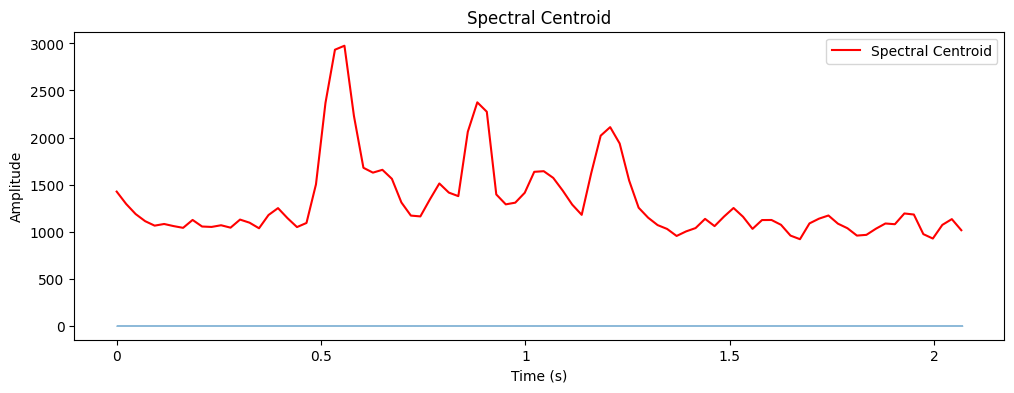

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Function to plot the spectral centroid of an audio file
def plot_spectral_centroid(audio_file):
    # Load the audio file
    y, sr = librosa.load(audio_file)

    # Compute the spectral centroid
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)[0]

    # Convert time to seconds
    times = librosa.times_like(spectral_centroid)

    # Plot the spectral centroid
    plt.figure(figsize=(12, 4))
    librosa.display.waveshow(y, sr=sr, alpha=0.5)
    plt.plot(times, spectral_centroid, label='Spectral Centroid', color='r')
    plt.title('Spectral Centroid')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()

# Example usage
audio_file_path = '/content/1001_IEO_ANG_LO.wav'
plot_spectral_centroid(audio_file_path)


Over sampling

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

# Assuming you have a dataset with features (X) and labels (y)
# X should be a numpy array with the shape (number_of_samples, feature_dimension)
# y should be a numpy array with the shape (number_of_samples,)
file_path = '/content/drive/MyDrive/emotion-intensity_comparefeature.csv'
data = pd.read_csv(file_path)

X = data.drop('EmotionAndIntensity', axis=1)
y = data['EmotionAndIntensity']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (you may need to adapt this based on your data)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Over-sample the minority class using RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Create a new DataFrame with the balanced dataset
balanced_data = pd.DataFrame(X_resampled, columns=X.columns)
balanced_data['EmotionAndIntensity'] = y_resampled

# Save the balanced dataset to a new CSV file
balanced_data.to_csv('/content/drive/MyDrive/OverSampled_EmotionIntensity_dataset.csv', index=False)

In [ ]:
# Count the number of elements in each class
import pandas as pd
file_path = '/content/drive/MyDrive/UnderSampled_balanced_Intensity_dataset.csv'
data = pd.read_csv(file_path)
class_counts = data['EmotionAndIntensity'].value_counts()

# Display the counts
print("Number of elements in each class:")
print(class_counts)

Number of elements in each class:
AngryHigh             1
AngryLow              1
SadUnspecified        1
SadMedium             1
SadLow                1
SadHigh               1
NeutralUnspecified    1
HappyUnspecified      1
HappyMedium           1
HappyLow              1
HappyHigh             1
FearUnspecified       1
FearMedium            1
FearLow               1
FearHigh              1
DisgustUnspecified    1
DisgustMedium         1
DisgustLow            1
DisgustHigh           1
AngryUnspecified      1
AngryMedium           1
Unknown               1
Name: EmotionAndIntensity, dtype: int64


Under Sampling

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler

# Assuming you have a dataset with features (X) and labels (y)
# X should be a numpy array with the shape (number_of_samples, feature_dimension)
# y should be a numpy array with the shape (number_of_samples,)
file_path = '/content/drive/MyDrive/emotion-intensity_comparefeature.csv'
data = pd.read_csv(file_path)

X = data.drop('EmotionAndIntensity', axis=1)
y = data['EmotionAndIntensity']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (you may need to adapt this based on your data)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Under-sample the majority class using RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Create a new DataFrame with the balanced dataset
balanced_data = pd.DataFrame(X_resampled, columns=X.columns)
balanced_data['EmotionAndIntensity'] = y_resampled

# Save the balanced dataset to a new CSV file
balanced_data.to_csv('/content/drive/MyDrive/UnderSampled_balanced_Intensity_dataset.csv', index=False)

KNN

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score

def train_model_knn(file_path):
    # Load CSV file
    data = pd.read_csv(file_path)

    # Preprocess data if needed

    # Convert string labels to numeric values
    label_encoder = LabelEncoder()
    data['EmotionAndIntensity'] = label_encoder.fit_transform(data['EmotionAndIntensity'])
    data.fillna(data.mean(), inplace=True)

    # Split into features and labels
    X = data.drop('EmotionAndIntensity', axis=1)
    y = data['EmotionAndIntensity']

    scaler = StandardScaler()
    X_standardized = scaler.fit_transform(X)

    # Create a KNN model
    knn_model = KNeighborsClassifier()

    # Perform K-fold cross-validation
    num_folds = 5
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

    # Define variables outside the loop
    y_true_all = []
    y_pred_all = []

    for i, (train_index, test_index) in enumerate(kfold.split(X_standardized)):
        # Split the data into training and testing sets for this fold
        X_train, X_test = X_standardized[train_index], X_standardized[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Train the KNN model on the training set
        knn_model.fit(X_train, y_train)

        # Make predictions on the testing set
        y_pred = knn_model.predict(X_test)

        # Append true and predicted labels for computing overall metrics
        y_true_all.extend(y_test)
        y_pred_all.extend(y_pred)

        # Compute evaluation metrics for this fold
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        confusion_mat = confusion_matrix(y_test, y_pred)

        # Print the evaluation metrics for each fold
        #print(f'\nFold {i + 1} Metrics for {file_path}:')
        #print(f'Precision = {precision:.4f}')
        #print(f'Recall = {recall:.4f}')
        #print(f'F1 Score = {f1:.4f}')
        #print(f'Confusion Matrix:\n{confusion_mat}')

    # Compute overall metrics using all folds
    overall_precision = precision_score(y_true_all, y_pred_all, average='weighted')
    overall_recall = recall_score(y_true_all, y_pred_all, average='weighted')
    overall_f1 = f1_score(y_true_all, y_pred_all, average='weighted')
    overall_confusion_mat = confusion_matrix(y_true_all, y_pred_all)
    overall_accuracy = accuracy_score(y_true_all, y_pred_all)

    # Print overall metrics
    print(f'\nOverall Metrics for {file_path}:')
    print(f'Overall Precision = {overall_precision:.4f}')
    print(f'Overall Recall = {overall_recall:.4f}')
    print(f'Overall F1 Score = {overall_f1:.4f}')
    print(f'Overall Accuracy = {overall_accuracy:.4f}')
    print(f'Overall Confusion Matrix:\n{overall_confusion_mat}')

# Train the model with the first CSV file using KNN
file_path_1 = '/content/drive/MyDrive/OverSampled_EmotionIntensity_dataset.csv'
train_model_knn(file_path_1)


Overall Metrics for /content/drive/MyDrive/OverSampled_EmotionIntensity_dataset.csv:
Overall Precision = 0.8198
Overall Recall = 0.8346
Overall F1 Score = 0.8255
Overall Accuracy = 0.8346
Overall Confusion Matrix:
[[860   0   3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0 861   0   0   0   2   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0 863   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [ 19   7  10 605   2   0   4  56   1   0   0  18   2   0   2  80  53   1
    0   0   3   0]
 [  0   0   0   0 863   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   0   0 863   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   0   0   0 863   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   3   6  89   2  10   6 302   0   7   3 101   0   0   3  53 133   9
    3   6 127   0]
 [  0   0   0   0   0   0   0   0 863   0

Random Forrest

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score

def train_random_forest(file_path):
    # Load CSV file
    data = pd.read_csv(file_path)

    # Preprocess data if needed

    # Convert string labels to numeric values
    label_encoder = LabelEncoder()
    data['EmotionAndIntensity'] = label_encoder.fit_transform(data['EmotionAndIntensity'])
    data.fillna(data.mean(), inplace=True)

    # Split into features and labels
    X = data.drop('EmotionAndIntensity', axis=1)
    y = data['EmotionAndIntensity']

    # Create a Random Forest model
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

    # Perform K-fold cross-validation
    num_folds = 5
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

    # Define variables outside the loop
    y_true_all = []
    y_pred_all = []

    for i, (train_index, test_index) in enumerate(kfold.split(X)):
        # Split the data into training and testing sets for this fold
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Train the Random Forest model on the training set
        rf_model.fit(X_train, y_train)

        # Make predictions on the testing set
        y_pred = rf_model.predict(X_test)

        # Append true and predicted labels for computing overall metrics
        y_true_all.extend(y_test)
        y_pred_all.extend(y_pred)

        # Compute evaluation metrics for this fold
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        confusion_mat = confusion_matrix(y_test, y_pred)

        # Print the evaluation metrics for each fold
        #print(f'\nFold {i + 1} Metrics for {file_path}:')
        #print(f'Precision = {precision:.4f}')
        #print(f'Recall = {recall:.4f}')
        #print(f'F1 Score = {f1:.4f}')
        #print(f'Confusion Matrix:\n{confusion_mat}')

    # Compute overall metrics using all folds
    overall_precision = precision_score(y_true_all, y_pred_all, average='weighted')
    overall_recall = recall_score(y_true_all, y_pred_all, average='weighted')
    overall_f1 = f1_score(y_true_all, y_pred_all, average='weighted')
    overall_confusion_mat = confusion_matrix(y_true_all, y_pred_all)
    overall_accuracy = accuracy_score(y_true_all, y_pred_all)

    # Print overall metrics
    print(f'\nOverall Metrics for {file_path}:')
    print(f'Overall Precision = {overall_precision:.4f}')
    print(f'Overall Recall = {overall_recall:.4f}')
    print(f'Overall F1 Score = {overall_f1:.4f}')
    print(f'Overall Accuracy = {overall_accuracy:.4f}')
    print(f'Overall Confusion Matrix:\n{overall_confusion_mat}')

# Train the Random Forest model with the first CSV file
file_path_1 = '/content/drive/MyDrive/OverSampled_EmotionIntensity_dataset.csv'
train_random_forest(file_path_1)


Overall Metrics for /content/drive/MyDrive/OverSampled_EmotionIntensity_dataset.csv:
Overall Precision = 0.8784
Overall Recall = 0.8795
Overall F1 Score = 0.8751
Overall Accuracy = 0.8795
Overall Confusion Matrix:
[[863   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0 863   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0 863   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  3   0   0 685   0   0   0  31   0   0   0  10   0   0   0  89  42   0
    0   0   3   0]
 [  0   0   0   0 863   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   0   0 863   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   0   0   0 863   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0  64   0   0   0 376   0   0   0  38   0   0   0  83 143   1
    0   1 157   0]
 [  0   0   0   0   0   0   0   0 863   0

SVM

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score

def train_model(file_path):
    # Load CSV file
    data = pd.read_csv(file_path)

    # Preprocess data if needed

    # Convert string labels to numeric values
    label_encoder = LabelEncoder()
    data['EmotionAndIntensity'] = label_encoder.fit_transform(data['EmotionAndIntensity'])
    data.fillna(data.mean(), inplace=True)

    # Split into features and labels
    X = data.drop('EmotionAndIntensity', axis=1)
    y = data['EmotionAndIntensity']

    scaler = StandardScaler()
    X_standardized = scaler.fit_transform(X)

    # Create an SVM model
    svm_model = SVC()

    # Perform K-fold cross-validation
    num_folds = 5
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

    # Define variables outside the loop
    y_true_all = []
    y_pred_all = []

    for i, (train_index, test_index) in enumerate(kfold.split(X_standardized)):
        # Split the data into training and testing sets for this fold
        X_train, X_test = X_standardized[train_index], X_standardized[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Train the model on the training set
        svm_model.fit(X_train, y_train)

        # Make predictions on the testing set
        y_pred = svm_model.predict(X_test)

        # Append true and predicted labels for computing overall metrics
        y_true_all.extend(y_test)
        y_pred_all.extend(y_pred)

        # Compute evaluation metrics for this fold
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        confusion_mat = confusion_matrix(y_test, y_pred)


        # Print the evaluation metrics for each fold
        #print(f'\nFold {i + 1} Metrics for {file_path}:')
        #print(f'Precision = {precision:.4f}')
        #print(f'Recall = {recall:.4f}')
        #print(f'F1 Score = {f1:.4f}')
        #print(f'Confusion Matrix:\n{confusion_mat}')

    # Compute overall metrics using all folds
    overall_precision = precision_score(y_true_all, y_pred_all, average='weighted')
    overall_recall = recall_score(y_true_all, y_pred_all, average='weighted')
    overall_f1 = f1_score(y_true_all, y_pred_all, average='weighted')
    overall_confusion_mat = confusion_matrix(y_true_all, y_pred_all)
    overall_accuracy = accuracy_score(y_true_all, y_pred_all)

    # Print overall metrics
    print(f'\nOverall Metrics for {file_path}:')
    print(f'Overall Precision = {overall_precision:.4f}')
    print(f'Overall Recall = {overall_recall:.4f}')
    print(f'Overall F1 Score = {overall_f1:.4f}')
    print(f'Overall Accuracy = {overall_accuracy:.4f}')
    print(f'Overall Confusion Matrix:\n{overall_confusion_mat}')

# Train the model with the first CSV file
file_path_1 = '/content/drive/MyDrive/OverSampled_EmotionIntensity_dataset.csv'
train_model(file_path_1)


Overall Metrics for /content/drive/MyDrive/OverSampled_EmotionIntensity_dataset.csv:
Overall Precision = 0.8985
Overall Recall = 0.8993
Overall F1 Score = 0.8981
Overall Accuracy = 0.8993
Overall Confusion Matrix:
[[863   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0 863   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0 863   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0 687   0   0   0  49   0   0   0  11   0   0   0  88  26   0
    0   0   2   0]
 [  0   0   0   0 863   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   0   0 863   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0   0   0   0 863   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0]
 [  0   0   0  71   0   0   1 491   0   0   0  51   0   0   0  57  64   0
    0   1 127   0]
 [  0   0   0   0   0   0   0   0 863   0

Correlation

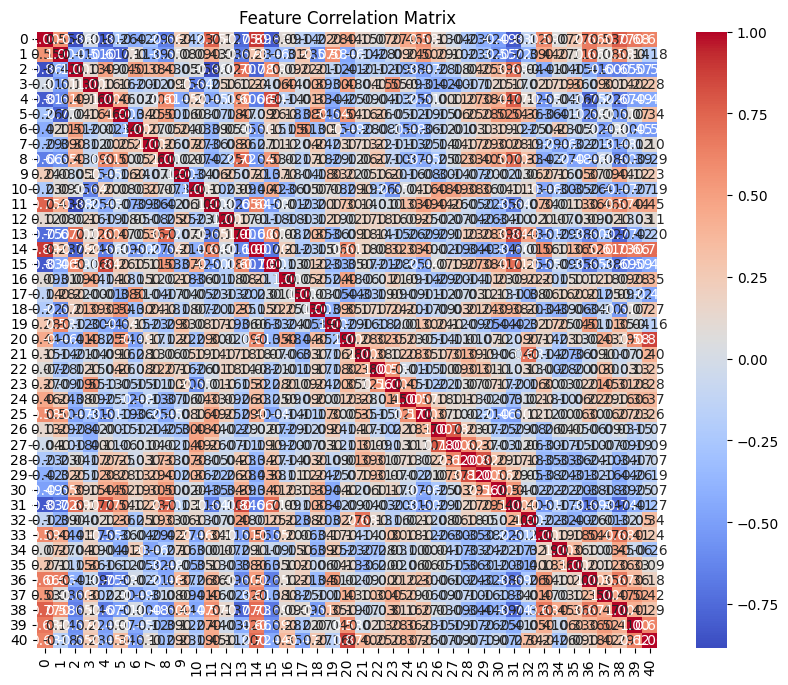

In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the audio file
audio_path = '/content/1001_IEO_ANG_HI.wav'
y, sr = librosa.load(audio_path)

# Extract features
mfccs = librosa.feature.mfcc(y=y, sr=sr)
spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)
chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
zero_crossing_rate = librosa.feature.zero_crossing_rate(y)

# Assuming equal length for simplicity; you may need to adjust this
features = np.vstack((mfccs, spectral_centroids, chroma_stft, spectral_contrast, zero_crossing_rate))
features = features.T  # Transpose so that columns are features

# Compute correlation matrix
correlation_matrix = np.corrcoef(features, rowvar=False)

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()
 it

In [ ]:
import librosa
import numpy as np
import scipy.stats

# Load the audio file
audio_path = '/content/1001_IEO_ANG_HI.wav'
y, sr = librosa.load(audio_path)

# Extract two features: Spectral Centroid and Zero Crossing Rate
spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)[0]  # Taking the first row for simplicity
zero_crossing_rate = librosa.feature.zero_crossing_rate(y)[0]  # Taking the first row for simplicity

# Ensure both features have the same length
min_length = min(len(spectral_centroids), len(zero_crossing_rate))
spectral_centroids = spectral_centroids[:min_length]
zero_crossing_rate = zero_crossing_rate[:min_length]

# Compute the Pearson correlation coefficient
correlation_coefficient, _ = scipy.stats.pearsonr(spectral_centroids, zero_crossing_rate)

print(f'Correlation coefficient between Spectral Centroid and Zero Crossing Rate: {correlation_coefficient}')


Correlation coefficient between Spectral Centroid and Zero Crossing Rate: 0.8662173774132212


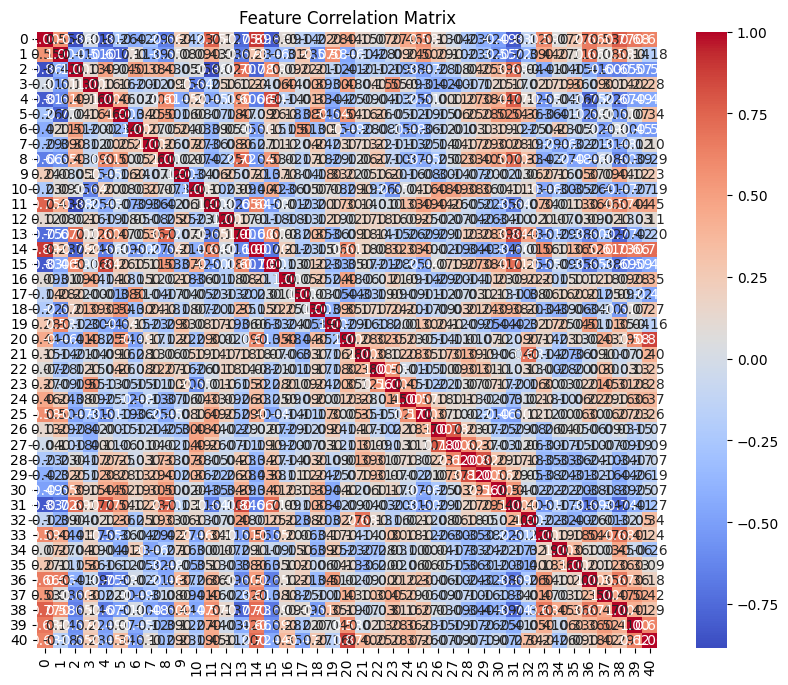

In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the audio file
audio_path = '/content/1001_IEO_ANG_HI.wav'
y, sr = librosa.load(audio_path)

# Extract features
mfccs = librosa.feature.mfcc(y=y, sr=sr)
spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)
chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
zero_crossing_rate = librosa.feature.zero_crossing_rate(y)

# Prepare the features for correlation analysis
features = np.vstack((mfccs, spectral_centroids, chroma_stft, spectral_contrast, zero_crossing_rate))

# Compute the correlation matrix across features (not across time frames)
correlation_matrix = np.corrcoef(features, rowvar=True)

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()


In [ ]:
import librosa
import numpy as np
import scipy.stats
import os

def compute_correlation(audio_path):
    y, sr = librosa.load(audio_path)
    spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y)[0]

    # Ensure both features have the same length
    min_length = min(len(spectral_centroids), len(zero_crossing_rate))
    spectral_centroids = spectral_centroids[:min_length]
    zero_crossing_rate = zero_crossing_rate[:min_length]

    # Compute the Pearson correlation coefficient
    correlation_coefficient, _ = scipy.stats.pearsonr(spectral_centroids, zero_crossing_rate)
    return correlation_coefficient

def average_correlation(directory_path):
    correlation_coefficients = []

    # Iterate through each audio file in the directory
    for filename in os.listdir(directory_path):
        if filename.endswith(".wav"):  # Adjust based on the file type
            audio_path = os.path.join(directory_path, filename)
            correlation = compute_correlation(audio_path)
            correlation_coefficients.append(correlation)

    # Compute the average correlation coefficient
    if correlation_coefficients:
        average_correlation = np.mean(correlation_coefficients)
        return average_correlation
    else:
        return None

directory_path = '/content/drive/MyDrive/AudioWAV/Angry'
average_correlation_value = average_correlation(directory_path)

if average_correlation_value is not None:
    print(f'Average Correlation Coefficient between Spectral Centroid and Zero Crossing Rate for Angry: {average_correlation_value}')
else:
    print('No audio files found or unable to compute correlation.')


Average Correlation Coefficient between Spectral Centroid and Zero Crossing Rate for Angry: 0.8702228155083418


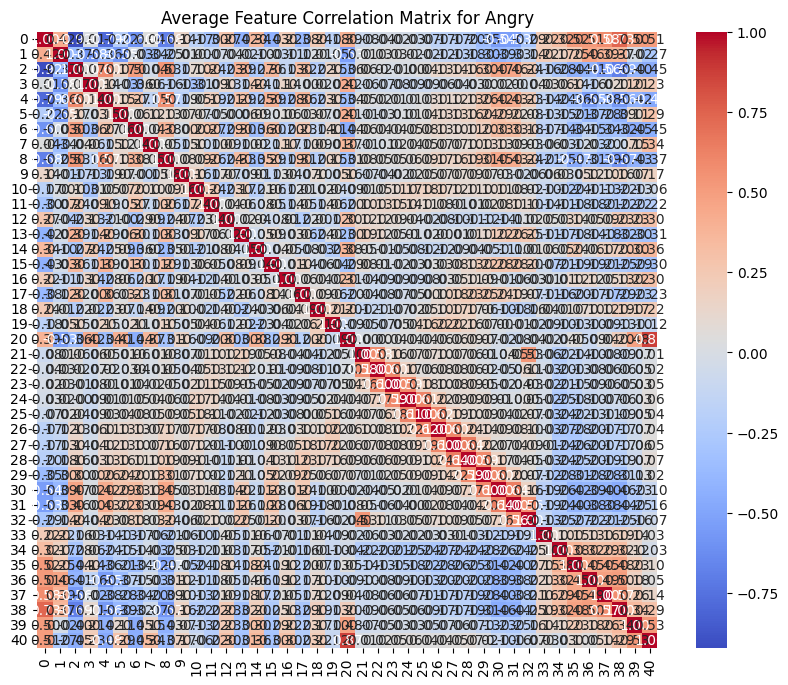

In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

def extract_and_compute_correlation(audio_path):
    y, sr = librosa.load(audio_path)
    mfccs = librosa.feature.mfcc(y=y, sr=sr)
    spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y)
    features = np.vstack((mfccs, spectral_centroids, chroma_stft, spectral_contrast, zero_crossing_rate))
    correlation_matrix = np.corrcoef(features, rowvar=True)
    return correlation_matrix

def average_correlation_matrix(directory_path):
    correlation_matrices = []
    for filename in os.listdir(directory_path):
        if filename.endswith(".wav"):  # Adjust based on your audio file format
            audio_path = os.path.join(directory_path, filename)
            correlation_matrix = extract_and_compute_correlation(audio_path)
            correlation_matrices.append(correlation_matrix)

    # Compute the average correlation matrix
    if correlation_matrices:
        average_matrix = np.mean(correlation_matrices, axis=0)
        return average_matrix
    else:
        return None

directory_path = '/content/drive/MyDrive/AudioWAV/Angry'
average_matrix = average_correlation_matrix(directory_path)

if average_matrix is not None:
    plt.figure(figsize=(10, 8))
    sns.heatmap(average_matrix, annot=True, fmt=".2f", cmap="coolwarm")
    plt.title("Average Feature Correlation Matrix for Angry")
    plt.show()
else:
    print('No audio files found or unable to compute average correlation matrix.')


In [ ]:
def compute_average_correlation(directory_path):
    correlation_coefficients = []

    for filename in os.listdir(directory_path):
        if filename.endswith(".wav"):  # Adjust based on your audio file format
            audio_path = os.path.join(directory_path, filename)
            spectral_centroids, zero_crossing_rate = extract_features(audio_path)

            # Ensure both features have the same length
            min_length = min(len(spectral_centroids), len(zero_crossing_rate))
            spectral_centroids = spectral_centroids[:min_length]
            zero_crossing_rate = zero_crossing_rate[:min_length]

            # Compute the Pearson correlation coefficient for these features
            correlation_coefficient, _ = scipy.stats.pearsonr(spectral_centroids, zero_crossing_rate)
            correlation_coefficients.append(correlation_coefficient)

    # Calculate the average correlation coefficient
    if correlation_coefficients:
        average_coefficient = np.mean(correlation_coefficients)
        return average_coefficient
    else:
        return None


In [ ]:
directory_path = '/content/drive/MyDrive/AudioWAV/Angry'
average_coefficient = compute_average_correlation(directory_path)

if average_coefficient is not None:
    print(f'Average Correlation Coefficient between Spectral Centroid and Zero Crossing Rate: {average_coefficient}')
else:
    print('No audio files found or unable to compute correlation.')

NameError: name 'extract_features' is not defined

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score

def train_model(file_path):
    # Load CSV file
    data = pd.read_csv(file_path)

    # Preprocess data if needed

    # Convert string labels to numeric values
    label_encoder = LabelEncoder()
    data['emotion'] = label_encoder.fit_transform(data['emotion'])
    data.fillna(data.mean(), inplace=True)

    # Split into features and labels
    X = data.drop('emotion', axis=1)
    y = data['emotion']

    scaler = StandardScaler()
    X_standardized = scaler.fit_transform(X)

    # Create an SVM model
    svm_model = SVC()

    # Perform K-fold cross-validation
    num_folds = 5
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

    # Define variables outside the loop
    class_accuracies = {class_label: [] for class_label in label_encoder.classes_}

    for i, (train_index, test_index) in enumerate(kfold.split(X_standardized)):
        # Split the data into training and testing sets for this fold
        X_train, X_test = X_standardized[train_index], X_standardized[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Train the model on the training set
        svm_model.fit(X_train, y_train)

        # Make predictions on the testing set
        y_pred = svm_model.predict(X_test)

        # Compute accuracy for each class in this fold
        accuracy_per_class = accuracy_score(y_test, y_pred, normalize=False)
        for class_label, accuracy in zip(label_encoder.classes_, accuracy_per_class):
            class_accuracies[class_label].append(accuracy)

    # Compute overall accuracy for each class
    overall_class_accuracies = {class_label: sum(acc_list) / len(acc_list) for class_label, acc_list in class_accuracies.items()}

    # Print overall accuracy for each class
    print(f'\nOverall Accuracy for each class in {file_path}:')
    for class_label, accuracy in overall_class_accuracies.items():
        print(f'Class {class_label}: {accuracy:.4f}')

# Train the model with the first CSV file
file_path_1 = '/content/drive/MyDrive/Copy of balanced_emotion_dataset.csv'
train_model(file_path_1)

# Train the model with the second CSV file
# file_path_2 = '/content/final_features_(1).csv'
# train_model(file_path_2)

# Train the model with the third CSV file
# file_path_3 = '/content/final_features_1.csv'
# train_model(file_path_3

TypeError: 'numpy.int64' object is not iterable

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score

def train_model(file_path):
    # Load CSV file
    data = pd.read_csv(file_path)

    # Preprocess data if needed

    # Convert string labels to numeric values
    label_encoder = LabelEncoder()
    data['Intensity'] = label_encoder.fit_transform(data['Intensity'])
    classes = label_encoder.classes_
    data.fillna(data.mean(), inplace=True)

    # Split into features and labels
    X = data.drop('Intensity', axis=1)
    y = data['Intensity']

    scaler = StandardScaler()
    X_standardized = scaler.fit_transform(X)

    # Create an SVM model
    svm_model = SVC()

    # Perform K-fold cross-validation
    num_folds = 5
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

    # Define variables outside the loop
    y_true_all = []
    y_pred_all = []

    classwise_accuracies = []

    for i, (train_index, test_index) in enumerate(kfold.split(X_standardized)):
        # Split the data into training and testing sets for this fold
        X_train, X_test = X_standardized[train_index], X_standardized[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Train the model on the training set
        svm_model.fit(X_train, y_train)

        # Make predictions on the testing set
        y_pred = svm_model.predict(X_test)

        # Append true and predicted labels for computing overall metrics
        y_true_all.extend(y_test)
        y_pred_all.extend(y_pred)

        # Compute evaluation metrics for this fold
        accuracy_per_class = []
        for label in np.unique(y_test):
            correct = np.sum((y_test == label) & (y_pred == label))
            total = np.sum(y_test == label)
            accuracy = correct / total if total != 0 else 0
            accuracy_per_class.append(accuracy)

        classwise_accuracies.append(accuracy_per_class)

    # Compute overall metrics using all folds
    overall_precision = precision_score(y_true_all, y_pred_all, average='weighted')
    overall_recall = recall_score(y_true_all, y_pred_all, average='weighted')
    overall_f1 = f1_score(y_true_all, y_pred_all, average='weighted')
    overall_confusion_mat = confusion_matrix(y_true_all, y_pred_all, labels=np.unique(y))
    overall_accuracy = accuracy_score(y_true_all, y_pred_all)

    # Print overall metrics
    print(f'\nOverall Metrics for {file_path}:')
    print(f'Overall Precision = {overall_precision:.4f}')
    print(f'Overall Recall = {overall_recall:.4f}')
    print(f'Overall F1 Score = {overall_f1:.4f}')
    print(f'Overall Accuracy = {overall_accuracy:.4f}')
    print(f'Overall Confusion Matrix:')
    print(pd.DataFrame(overall_confusion_mat, index=classes, columns=classes))

    # Compute average accuracy classwise
    classwise_accuracies = np.array(classwise_accuracies)
    average_accuracies = np.mean(classwise_accuracies, axis=0)
    print("\nAverage Accuracy Classwise:")
    for label, accuracy in enumerate(average_accuracies):
        class_name = label_encoder.inverse_transform([label])[0]
        print(f'{class_name}: {accuracy:.4f}')

# Train the model with the first CSV file
file_path_1 = '/content/drive/MyDrive/IntenFinal_Comparefeatureset.csv'
train_model(file_path_1)


Overall Metrics for /content/drive/MyDrive/IntenFinal_Comparefeatureset.csv:
Overall Precision = 0.8851
Overall Recall = 0.8887
Overall F1 Score = 0.8854
Overall Accuracy = 0.8887
Overall Confusion Matrix:
             High  Low  Medium  Unspecified
High          201   58     122           74
Low            23  260     128           44
Medium         80  143     162           70
Unspecified     2   68      16         5990

Average Accuracy Classwise:
High: 0.4436
Low: 0.5693
Medium: 0.3579
Unspecified: 0.9858


Heatmap

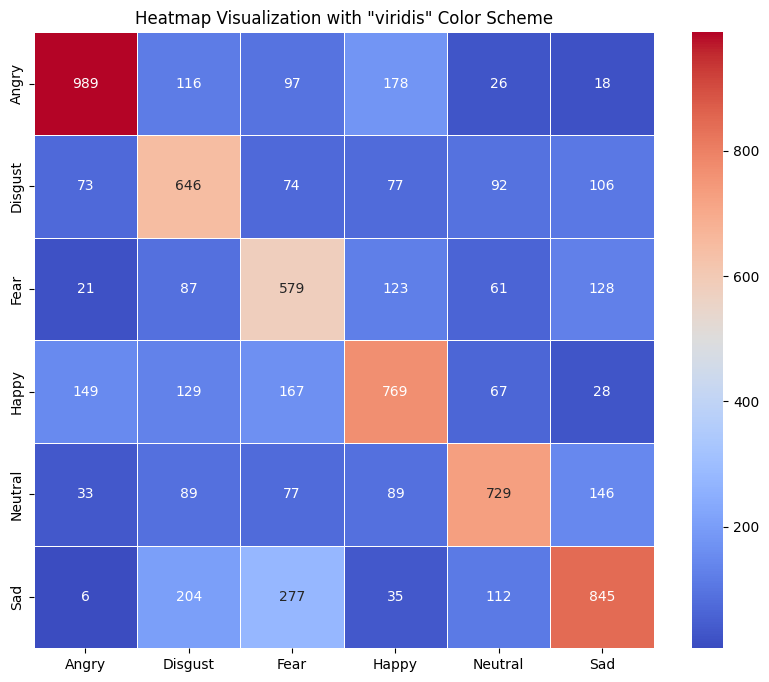

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data
data = {
    "Angry": [989, 73, 21, 149, 33, 6],
    "Disgust": [116, 646, 87, 129, 89, 204],
    "Fear": [97, 74, 579, 167, 77, 277],
    "Happy": [178, 77, 123, 769, 89, 35],
    "Neutral": [26, 92, 61, 67, 729, 112],
    "Sad": [18, 106, 128, 28, 146, 845],
}

# Create a DataFrame
df = pd.DataFrame(data, index=["Angry", "Disgust", "Fear", "Happy", "Neutral", "Sad"])

# Plot a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df, annot=True, fmt="d", cmap="coolwarm", linewidths=.5)
plt.title('Heatmap Visualization with "viridis" Color Scheme')
plt.show()


Histogram

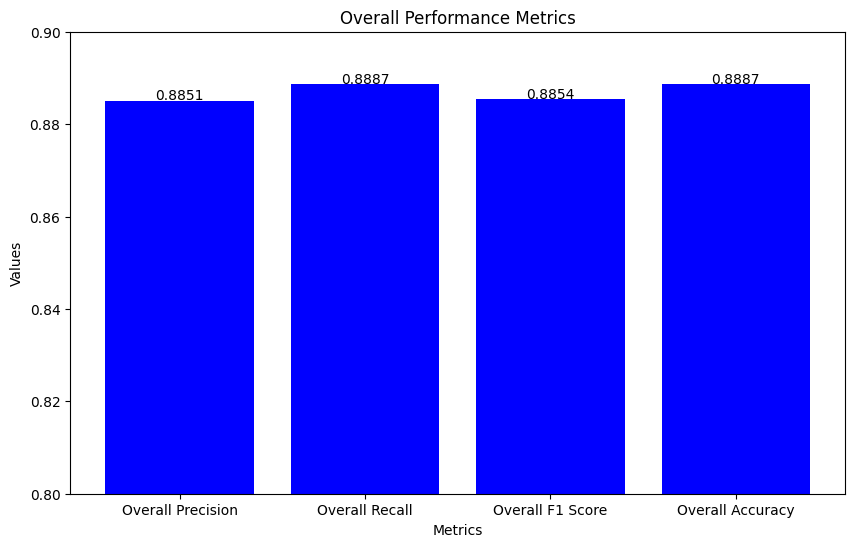

In [ ]:
import matplotlib.pyplot as plt

# Data
categories = ['Overall Precision', 'Overall Recall', 'Overall F1 Score', 'Overall Accuracy']
values = [0.8851, 0.8887, 0.8854, 0.8887]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(categories, values, color='blue')

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Overall Performance Metrics')
plt.ylim(0.8, 0.9)  # Adjust y-axis limits to make differences more visible

# Add value labels on top of each bar
for i, value in enumerate(values):
    plt.text(i, value + 0.0002, f'{value:.4f}', ha='center')

# Show the plot
plt.show()


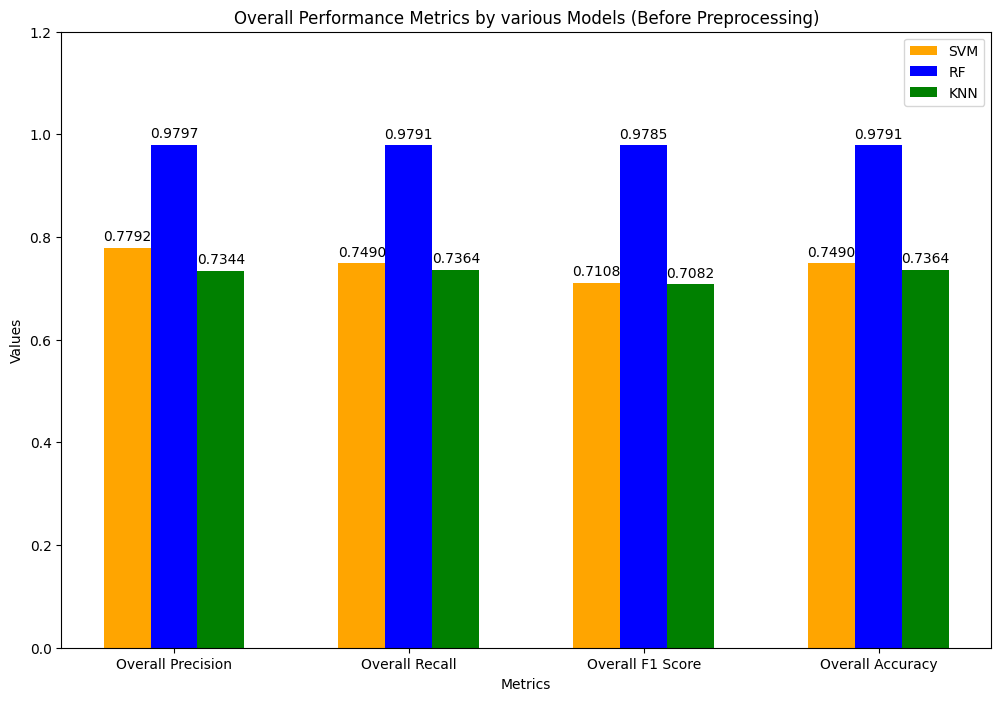

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data
categories = ['Overall Precision', 'Overall Recall', 'Overall F1 Score', 'Overall Accuracy']
svm_values = [0.7792, 0.7490, 0.7108, 0.7490]
rf_values = [0.9797, 0.9791, 0.9785, 0.9791]  # Example values for Model 2
knn_values = [0.7344, 0.7364, 0.7082, 0.7364]  # Example values for Model 3

# Set the positions and width for the bars
positions = np.arange(len(categories))
bar_width = 0.2

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.bar(positions - bar_width, svm_values, bar_width, label='SVM', color='orange')
rects2 = ax.bar(positions, rf_values, bar_width, label='RF', color='blue')
rects3 = ax.bar(positions + bar_width, knn_values, bar_width, label='KNN', color='green')

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Overall Performance Metrics by various Models (Before Preprocessing)')
ax.set_xticks(positions)
ax.set_xticklabels(categories)
ax.legend()

# Function to attach value labels above bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Attach value labels
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.ylim(0, 1.2)  # Adjust y-axis limits to make differences more visible

plt.show()
